In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
import re
from mpl_toolkits.axes_grid1 import ImageGrid
plt.style.use('ggplot')

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPool1D, BatchNormalization, Dropout, LSTM, Embedding, GlobalMaxPool1D, Reshape
from keras.utils.vis_utils import plot_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
df = pd.read_csv('tcc_ceds_music.csv')

In [4]:
df.head()

Unnamed: 0           artist_name            track_name  release_date genre  \
0           0                mukesh  mohabbat bhi jhoothi          1950   pop   
1           4         frankie laine             i believe          1950   pop   
2           6           johnnie ray                   cry          1950   pop   
3          10           pérez prado              patricia          1950   pop   
4          12  giorgos papadopoulos    apopse eida oneiro          1950   pop   

                                              lyrics  len    dating  violence  \
0  hold time feel break feel untrue convince spea...   95  0.000598  0.063746   
1  believe drop rain fall grow believe darkest ni...   51  0.035537  0.096777   
2  sweetheart send letter goodbye secret feel bet...   24  0.002770  0.002770   
3  kiss lips want stroll charm mambo chacha merin...   54  0.048249  0.001548   
4  till darling till matter know till dream live ...   48  0.001350  0.001350   

   world/life  ...   sadness  feelings  danceability  loudness  acousticness  \
0    0.000598  ...  0.380299  0.117175      0.357739  0.454119      0.997992   
1    0.443435  ...  0.001284  0.001284      0.331745  0.647540      0.954819   
2    0.002770  ...  0.002770  0.225422      0.456298  0.585288      0.840361   
3    0.001548  ...  0.225889  0.001548      0.686992  0.744404      0.083935   
4    0.417772  ...  0.068800  0.001350      0.291671  0.646489      0.975904   

   instrumentalness   valence    energy       topic  age  
0          0.901822  0.339448  0.137110     sadness  1.0  
1          0.000002  0.325021  0.263240  world/life  1.0  
2          0.000000  0.351814  0.139112       music  1.0  
3          0.199393  0.775350  0.743736    romantic  1.0  
4          0.000246  0.597073  0.394375    romantic  1.0  

[5 rows x 31 columns]

In [5]:
df.shape

(28372, 31)

<AxesSubplot:xlabel='genre', ylabel='count'>

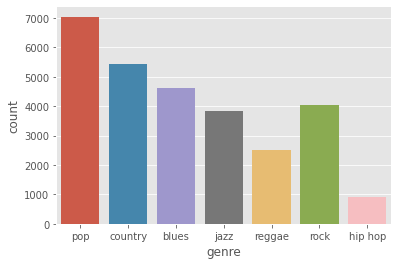

In [6]:
sns.countplot(x='genre',data=df)

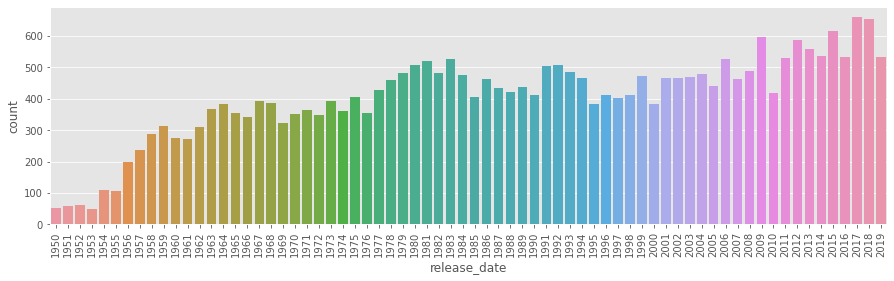

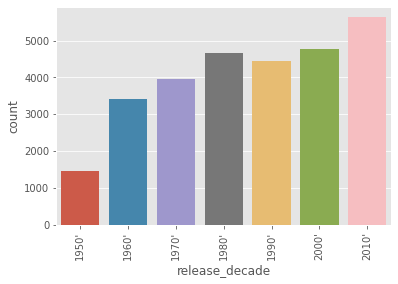

In [7]:
plt.figure(figsize=(15,4))
sns.countplot(x='release_date',data=df)
plt.xticks(rotation=90)
plt.show()
df['release_decade'] = df.apply(lambda row: str(int(row.release_date / 10) * 10) + "'", axis = 1)
sns.countplot(x='release_decade',data=df)
plt.xticks(rotation=90)
print()

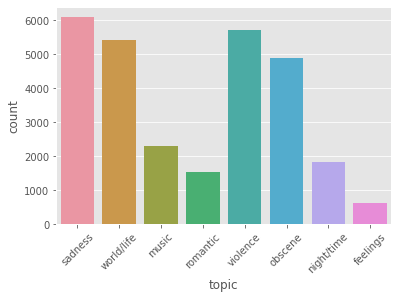

In [8]:
sns.countplot(x='topic',data=df)
plt.xticks(rotation=45)
print()

In [9]:
# clean = []
# stop_words = stopwords.words('english')
# stop_words.append('chorus')
# stop_words.append('verse')
# lemmatizer = WordNetLemmatizer()

In [10]:
# for index, row in df.iterrows():
#     lyrics = row['lyrics']
#     lyrics = re.sub('\n', "", lyrics)
#     lyrics = re.sub('x1', "", lyrics)
#     lyrics = re.sub('x2', "", lyrics)
#     lyrics = re.sub('x3', "", lyrics)
#     lyrics = re.sub('x4', "", lyrics)
#     lyrics = re.sub('x5', "", lyrics)
#     lyrics = re.sub('x6', "", lyrics)
#     lyrics = re.sub('x7', "", lyrics)
#     lyrics = re.sub('x8', "", lyrics)
#     lyrics = re.sub('x9', "", lyrics)
#     lyrics = lyrics.lower() #lowercasing
#     lyrics = re.sub("[^a-z]+", " ", lyrics) #remove all numbers and special chars
#     lyrics = lyrics.split()
#     lyrics = [word for word in lyrics if not word in stop_words] #remove stopwords
#     lyrics = [lemmatizer.lemmatize(token) for token in lyrics] #lemmatize
#     lyrics = [lemmatizer.lemmatize(token, "v") for token in lyrics]
#     lyrics = " ".join(lyrics)
#     clean.append(lyrics)
# df['clean_lyrics'] = clean #add clean lyrics to a new column in the dataframe

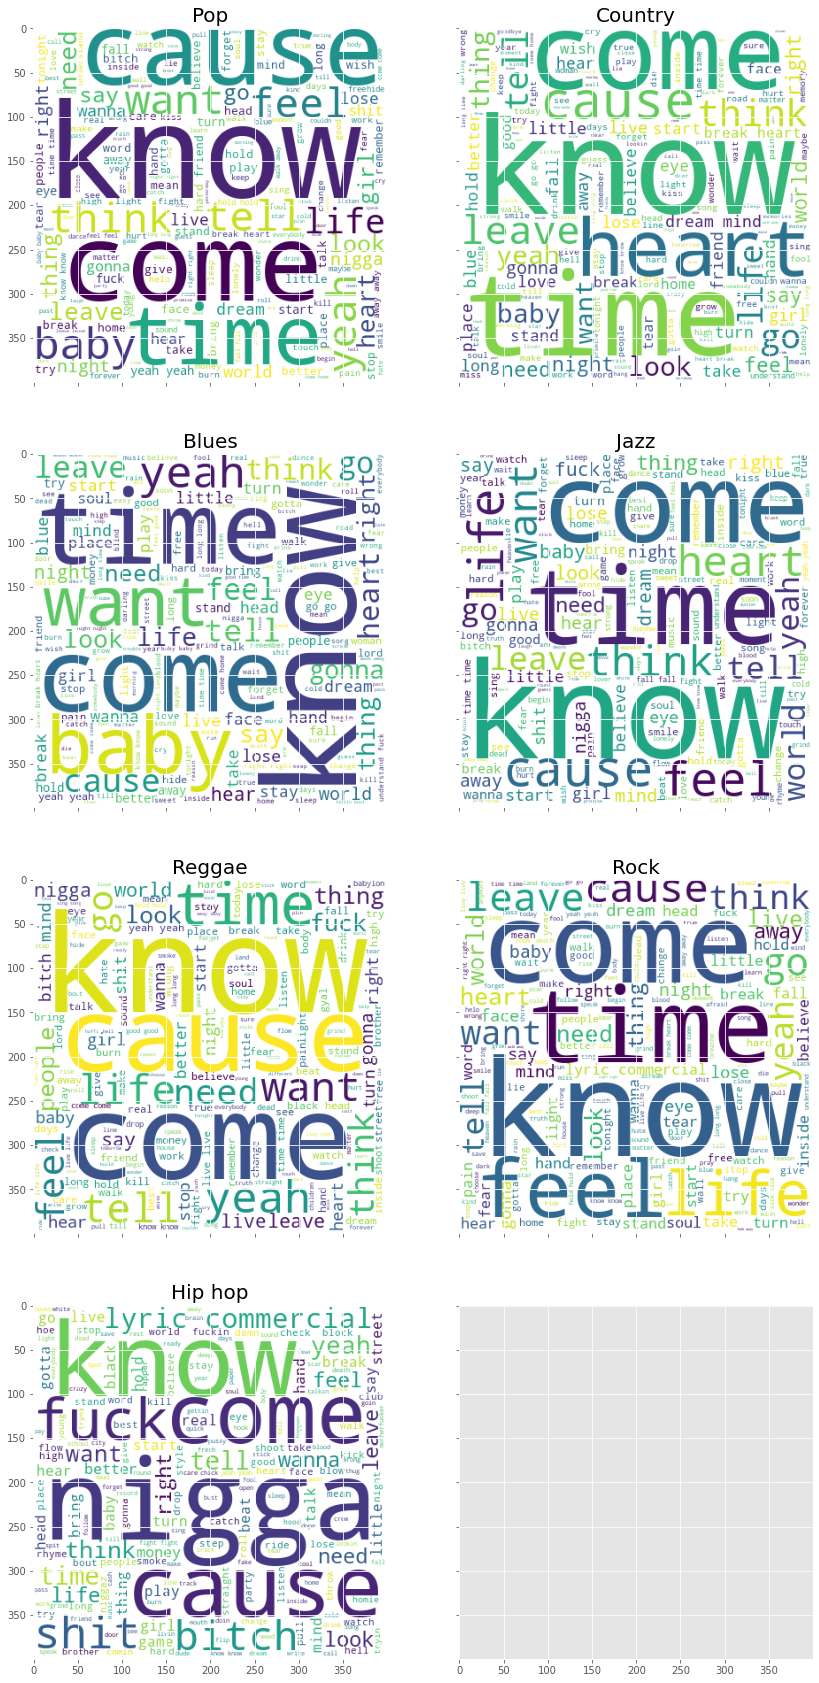

In [11]:
list_genres = ['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop']
dict_genres_words = {}
for genre in list_genres:
    dict_genres_words[genre] = ' '.join(df[df.genre == genre].lyrics.values)
    
wordcloud_figures = []
figure_titles = []
for genre in dict_genres_words:
    figure_titles.append(genre.capitalize())
    wordcloud_figures.append(WordCloud(width=400, height=400, background_color='white', repeat=False).generate(dict_genres_words[genre]))

fig = plt.figure(1,(30, 30))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 2), axes_pad = 1)
for i in range(len(list_genres)):
    grid[i].imshow(wordcloud_figures[i])
    grid[i].set_title(figure_titles[i], size = 20)

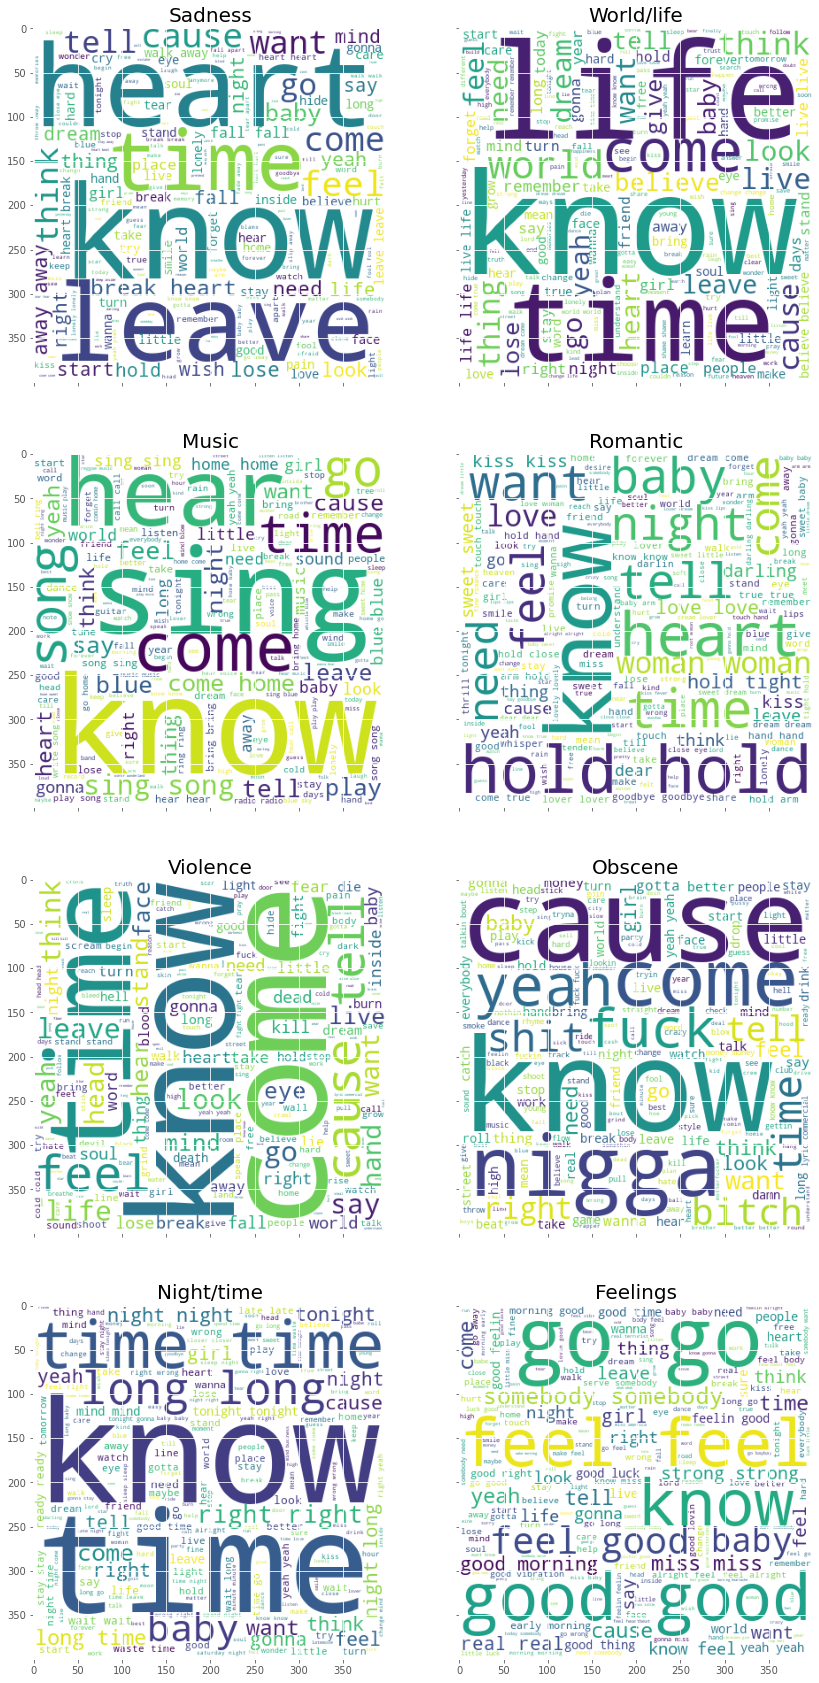

In [12]:
list_topics = ['sadness', 'world/life', 'music', 'romantic', 'violence', 'obscene', 'night/time', 'feelings']
dict_topics_words = {}
for topic in list_topics:
    dict_topics_words[topic] = ' '.join(df[df.topic == topic].lyrics.values)
    
wordcloud_figures = []
figure_titles = []
for topic in dict_topics_words:
    figure_titles.append(topic.capitalize())
    wordcloud_figures.append(WordCloud(width=400, height=400, background_color='white', repeat=False).generate(dict_topics_words[topic]))

fig = plt.figure(1,(30, 30))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 2), axes_pad = 1)
for i in range(len(list_topics)):
    grid[i].imshow(wordcloud_figures[i])
    grid[i].set_title(figure_titles[i], size = 20)

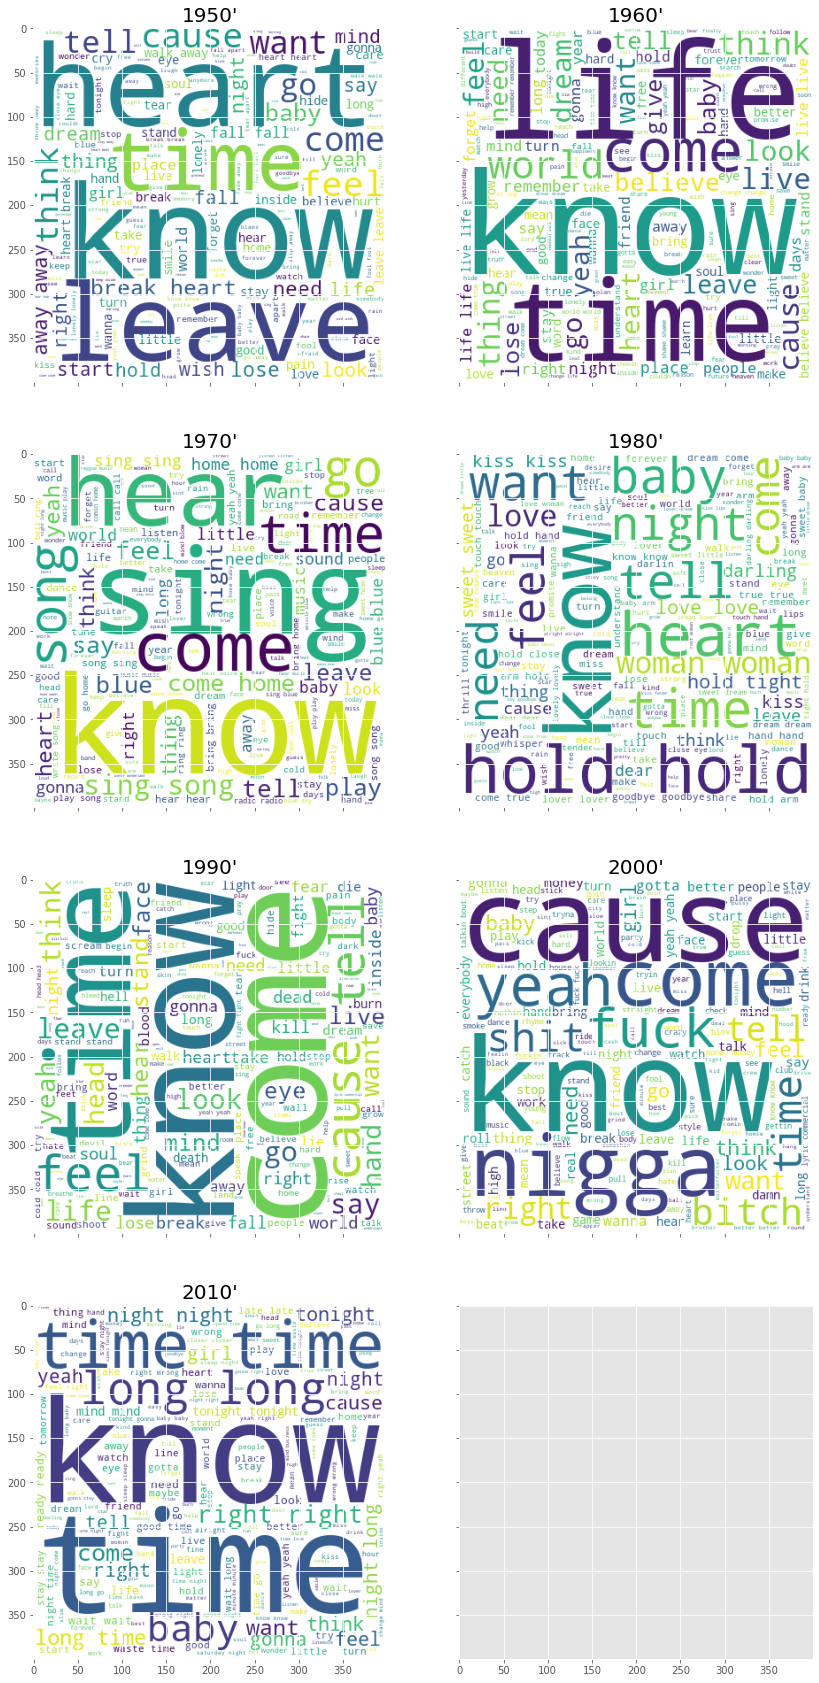

In [13]:
list_release_decades = ["1950'", "1960'", "1970'", "1980'", "1990'", "2000'", "2010'"]
dict_release_decades_words = {}
for release_decade in list_release_decades:
    dict_release_decades_words[release_decade] = ' '.join(df[df.release_decade == release_decade].lyrics.values)
    
for release_decade in list_release_decades:
    wordcloud_figures.append(WordCloud(width=400, height=400, background_color='white', repeat=False).generate(dict_release_decades_words[release_decade]))

fig = plt.figure(1,(30, 30))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 2), axes_pad = 1)
for i in range(len(list_release_decades)):
    grid[i].imshow(wordcloud_figures[i])
    grid[i].set_title(list_release_decades[i], size = 20)

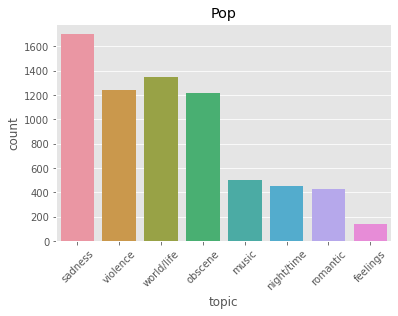

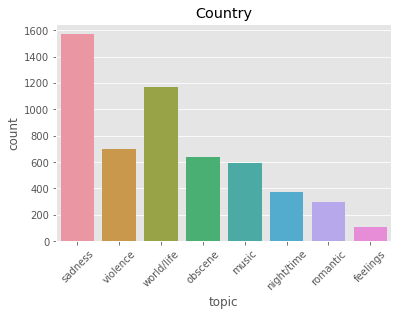

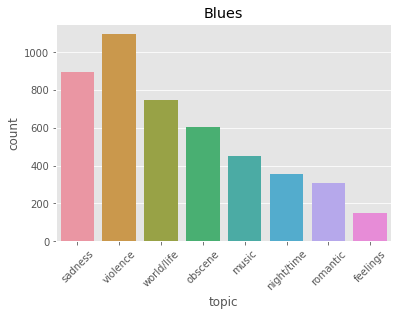

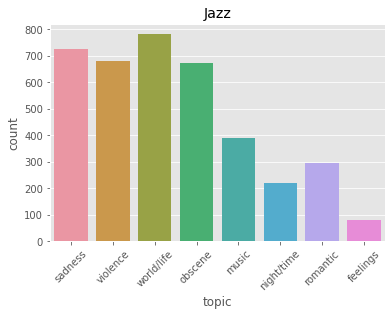

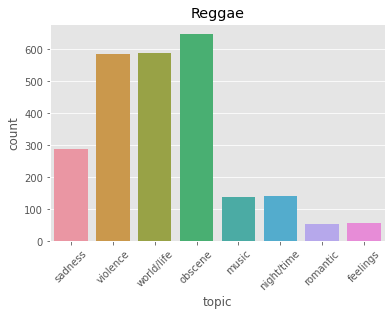

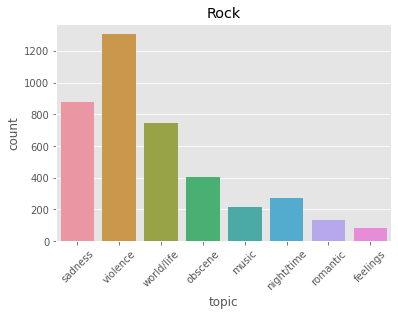

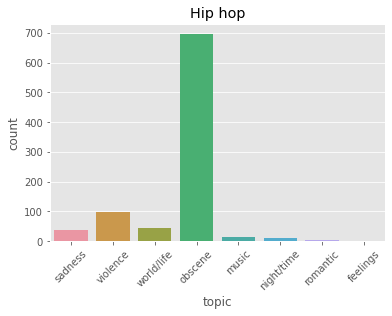

In [14]:
for i in range(len(list_genres)):
    sns.countplot(x='topic',data=df[df.genre == list_genres[i]], order = df.topic.value_counts().index)
    plt.xticks(rotation=45)
    plt.title(list_genres[i].capitalize())
    plt.show()

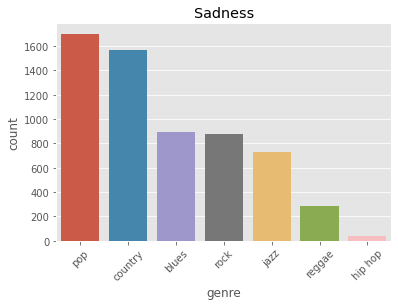

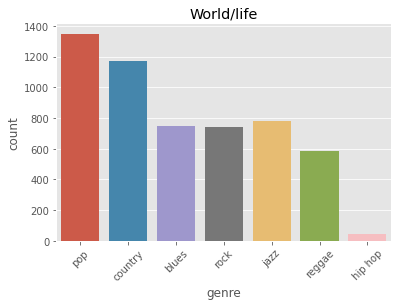

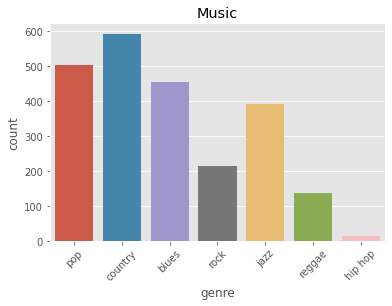

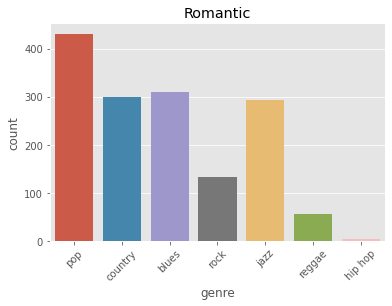

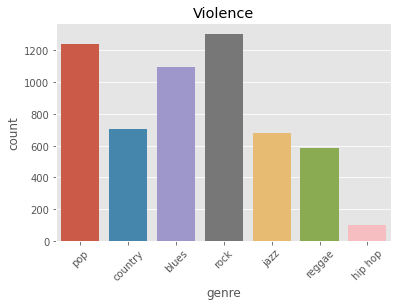

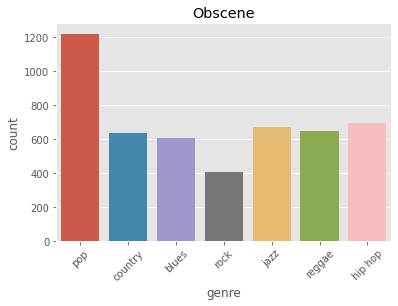

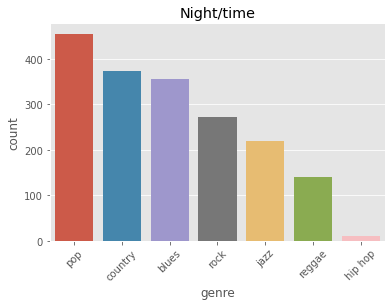

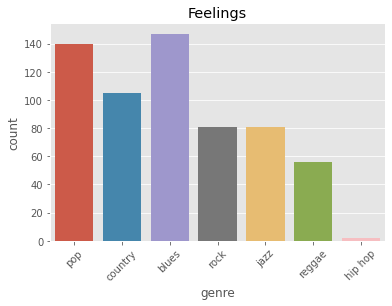

In [15]:
for i in range(len(list_topics)):
    sns.countplot(x='genre',data=df[df.topic == list_topics[i]], order = df.genre.value_counts().index)
    plt.xticks(rotation=45)
    plt.title(list_topics[i].capitalize())
    plt.show()

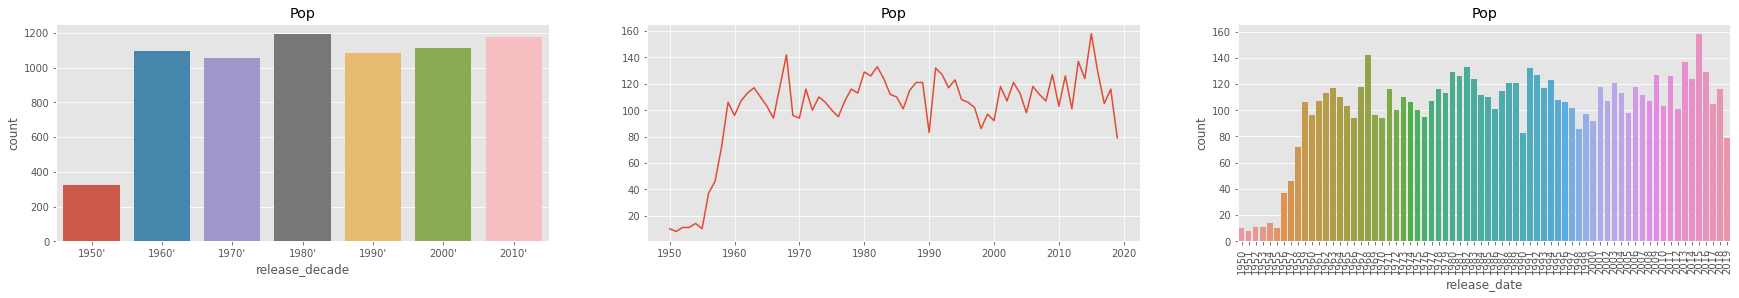

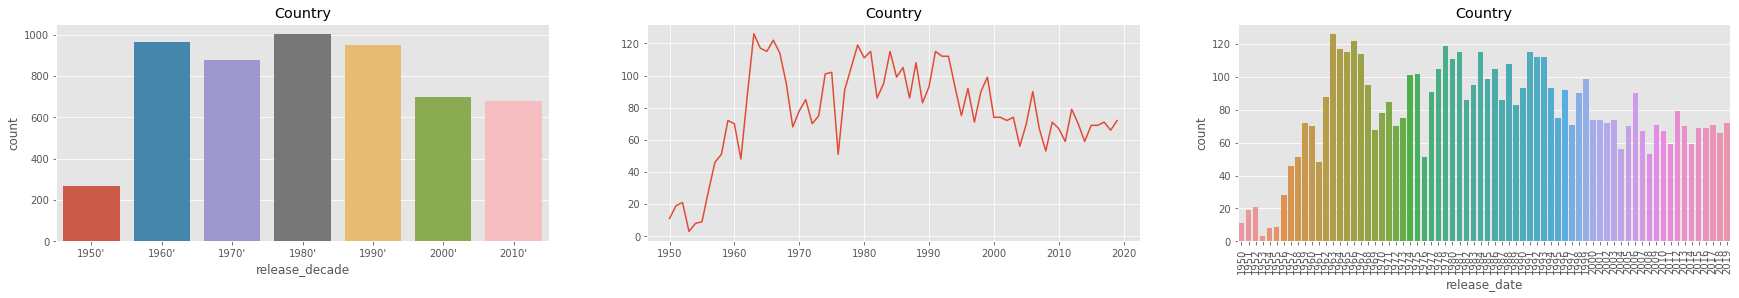

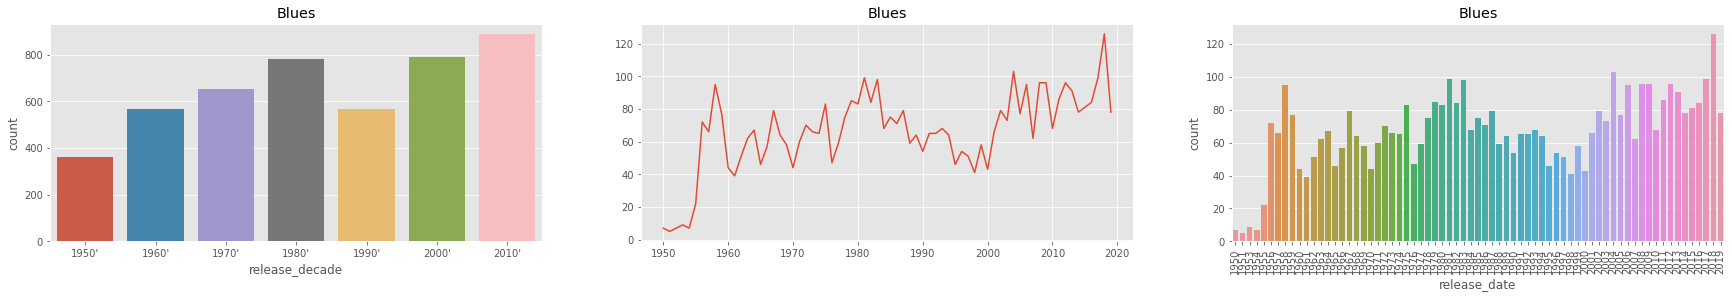

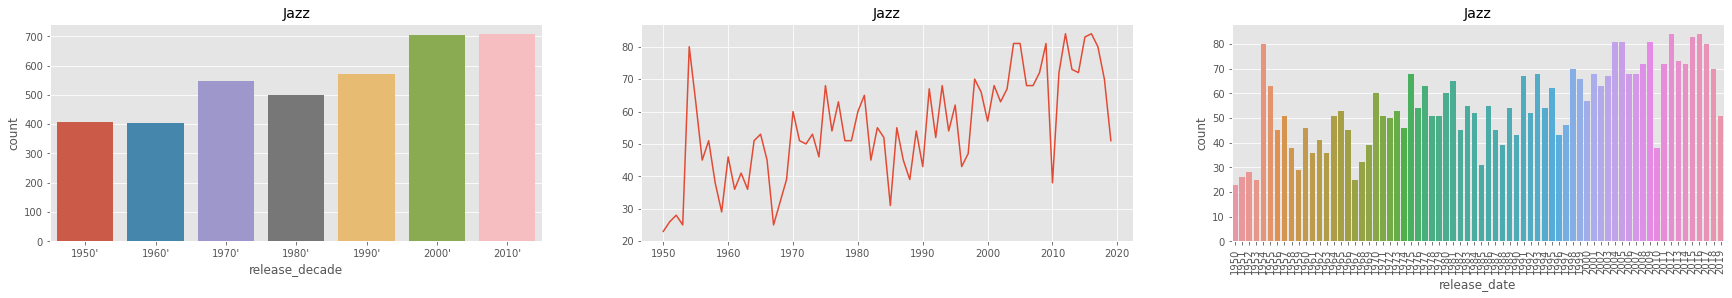

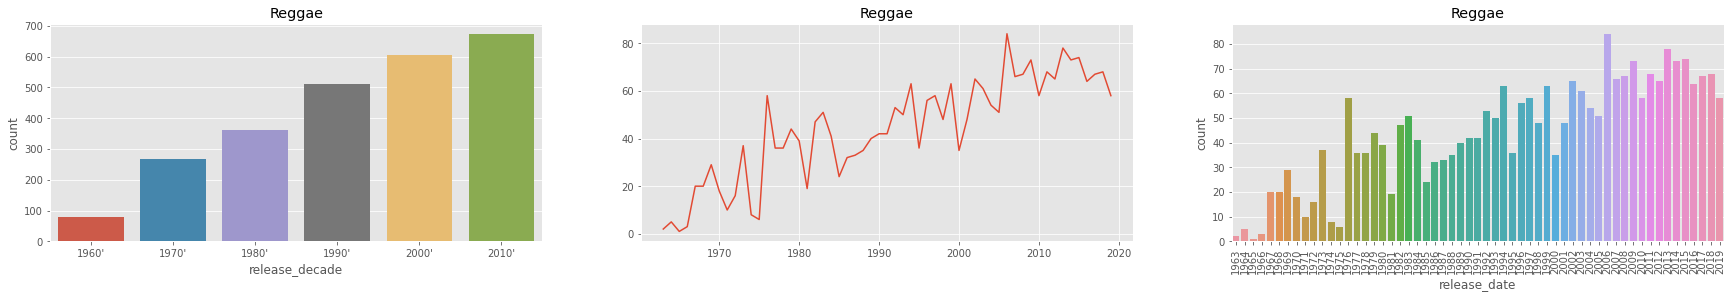

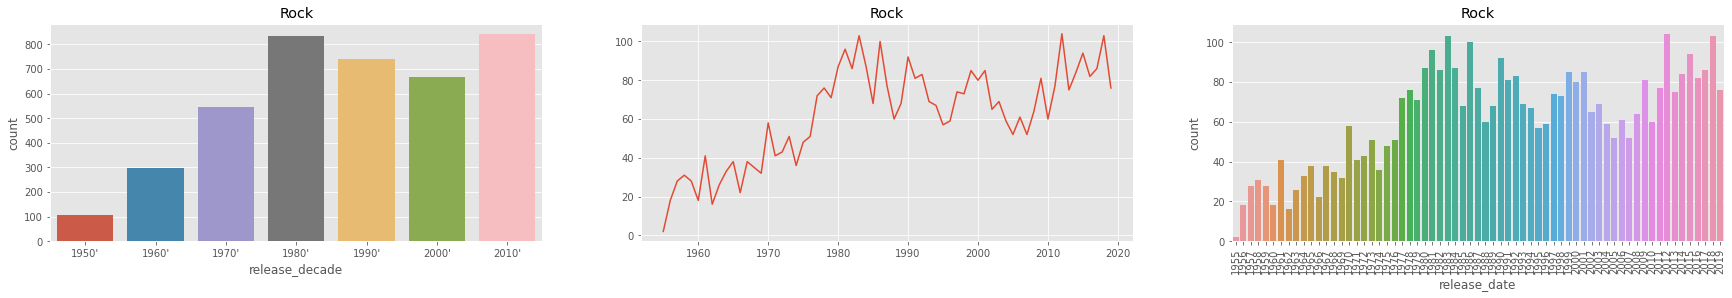

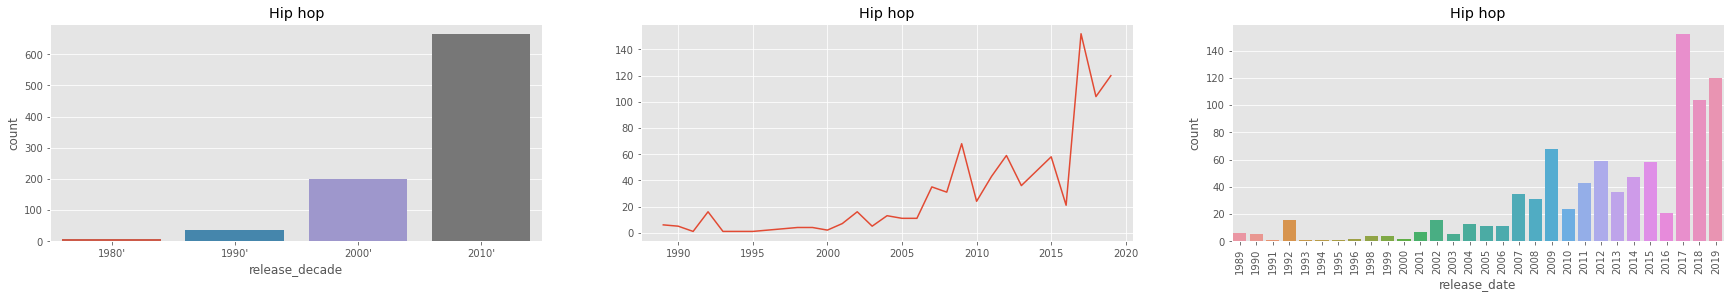

In [16]:
for i in range(len(list_genres)):
    fig, ax =plt.subplots(1,3, figsize=(30,4))
    df_genre = df[df.genre == list_genres[i]]
    
    plt.title(list_genres[i].capitalize())
    sns.countplot(x='release_decade',data=df_genre, ax=ax[0])
    ax[0].title.set_text(list_genres[i].capitalize())
    
    counts = df_genre['release_date'].value_counts(sort=False)
    sns.lineplot(x=counts.index, y=counts.values, ax=ax[1])
    ax[1].title.set_text(list_genres[i].capitalize())
    plt.xticks(rotation=90)
    sns.countplot(x='release_date',data=df_genre, ax=ax[2])
    plt.show()

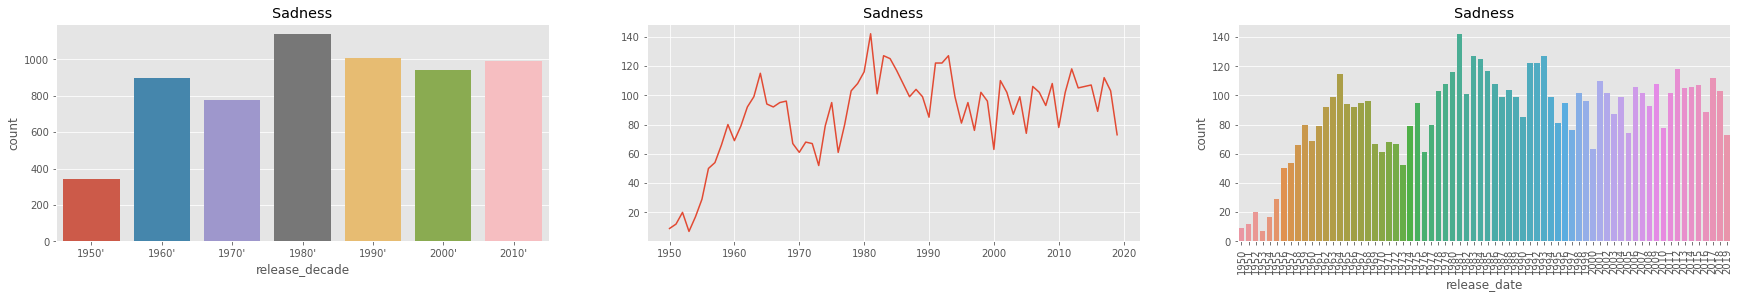

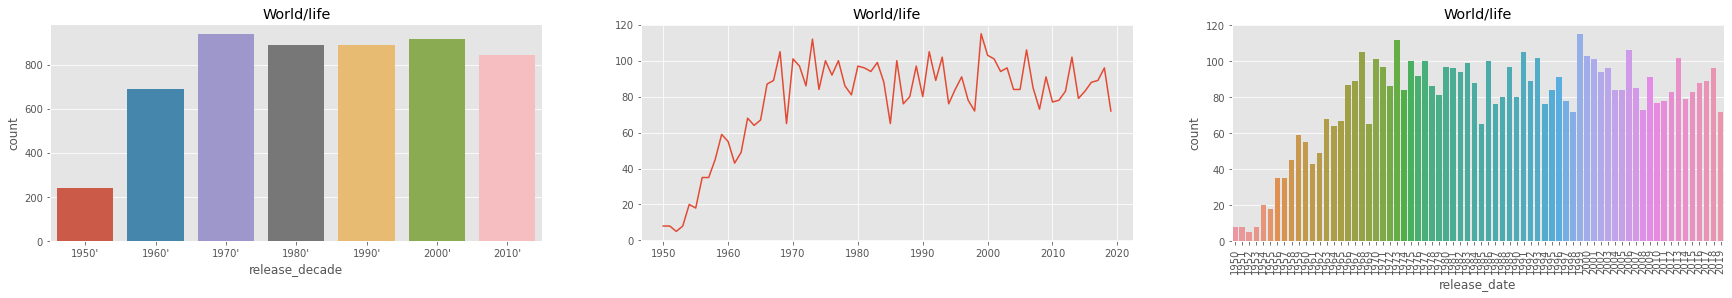

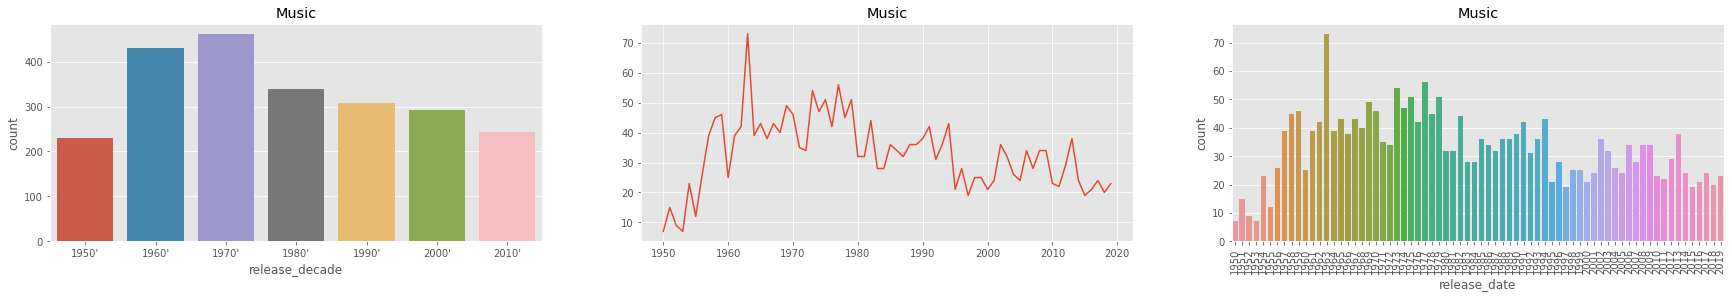

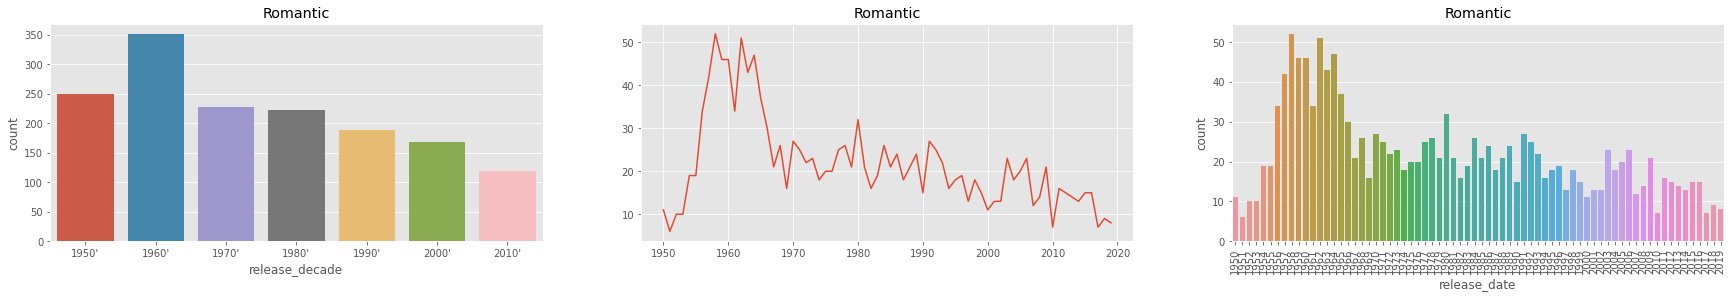

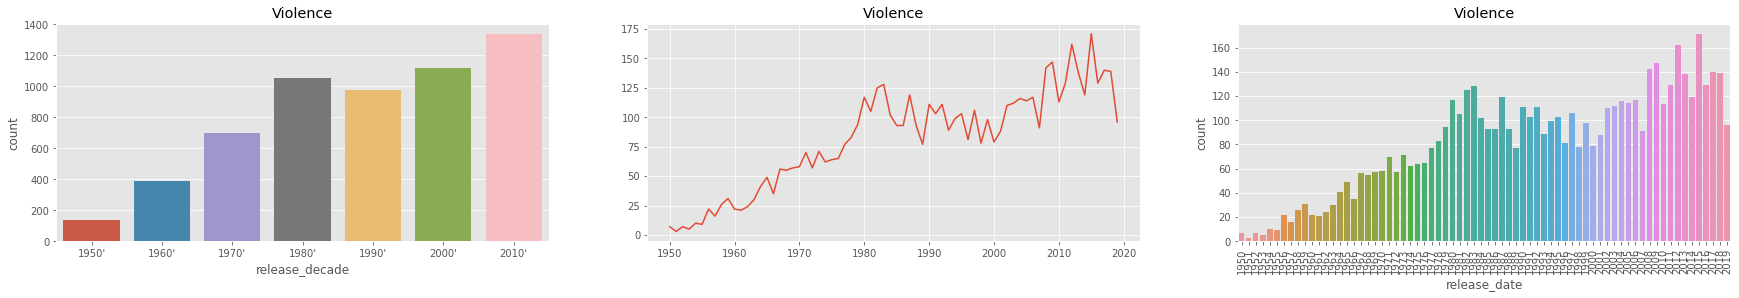

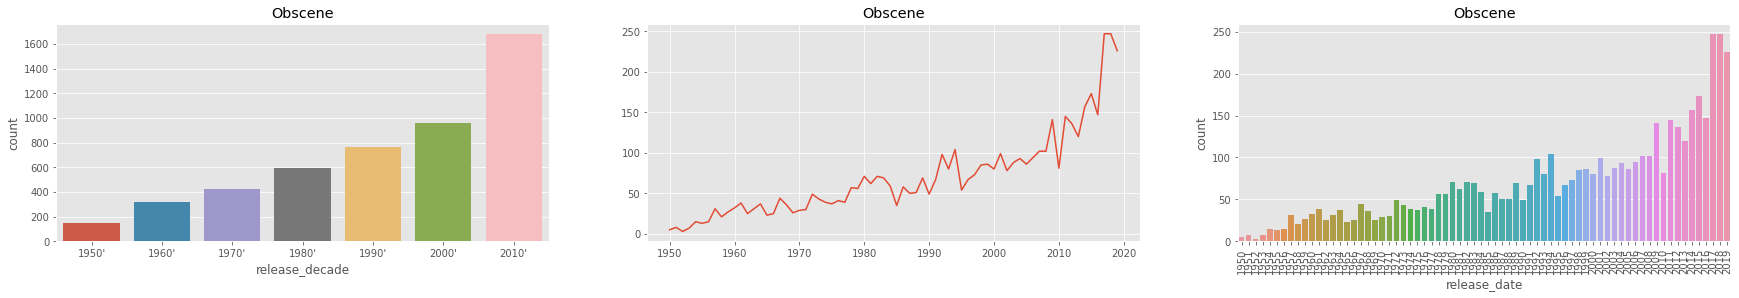

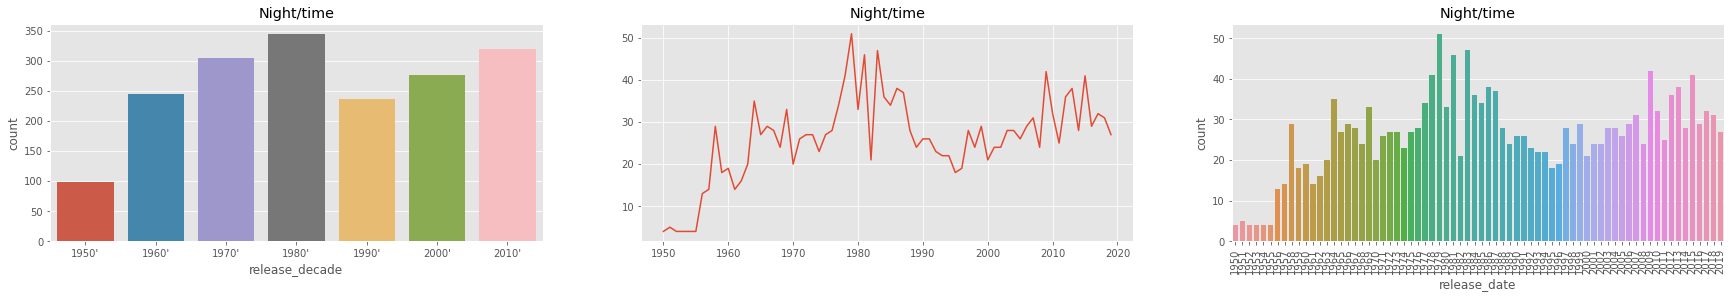

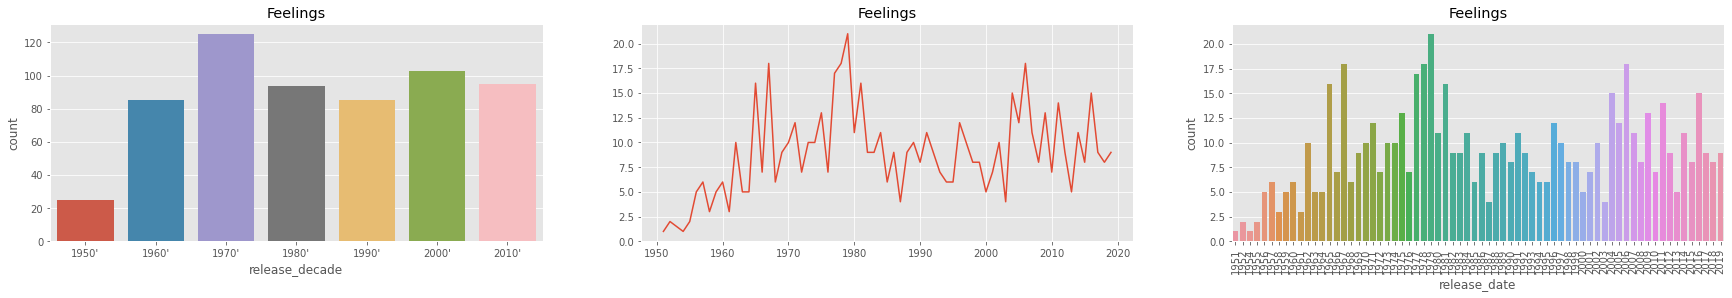

In [17]:
for i in range(len(list_topics)):
    fig, ax =plt.subplots(1,3, figsize=(30,4))
    df_topic = df[df.topic == list_topics[i]]
    
    plt.title(list_topics[i].capitalize())
    sns.countplot(x='release_decade',data=df_topic, ax=ax[0])
    ax[0].title.set_text(list_topics[i].capitalize())
    
    counts = df_topic['release_date'].value_counts(sort=False)
    sns.lineplot(x=counts.index, y=counts.values, ax=ax[1])
    ax[1].title.set_text(list_topics[i].capitalize())
    plt.xticks(rotation=90)
    sns.countplot(x='release_date',data=df_topic, ax=ax[2])
    plt.show()

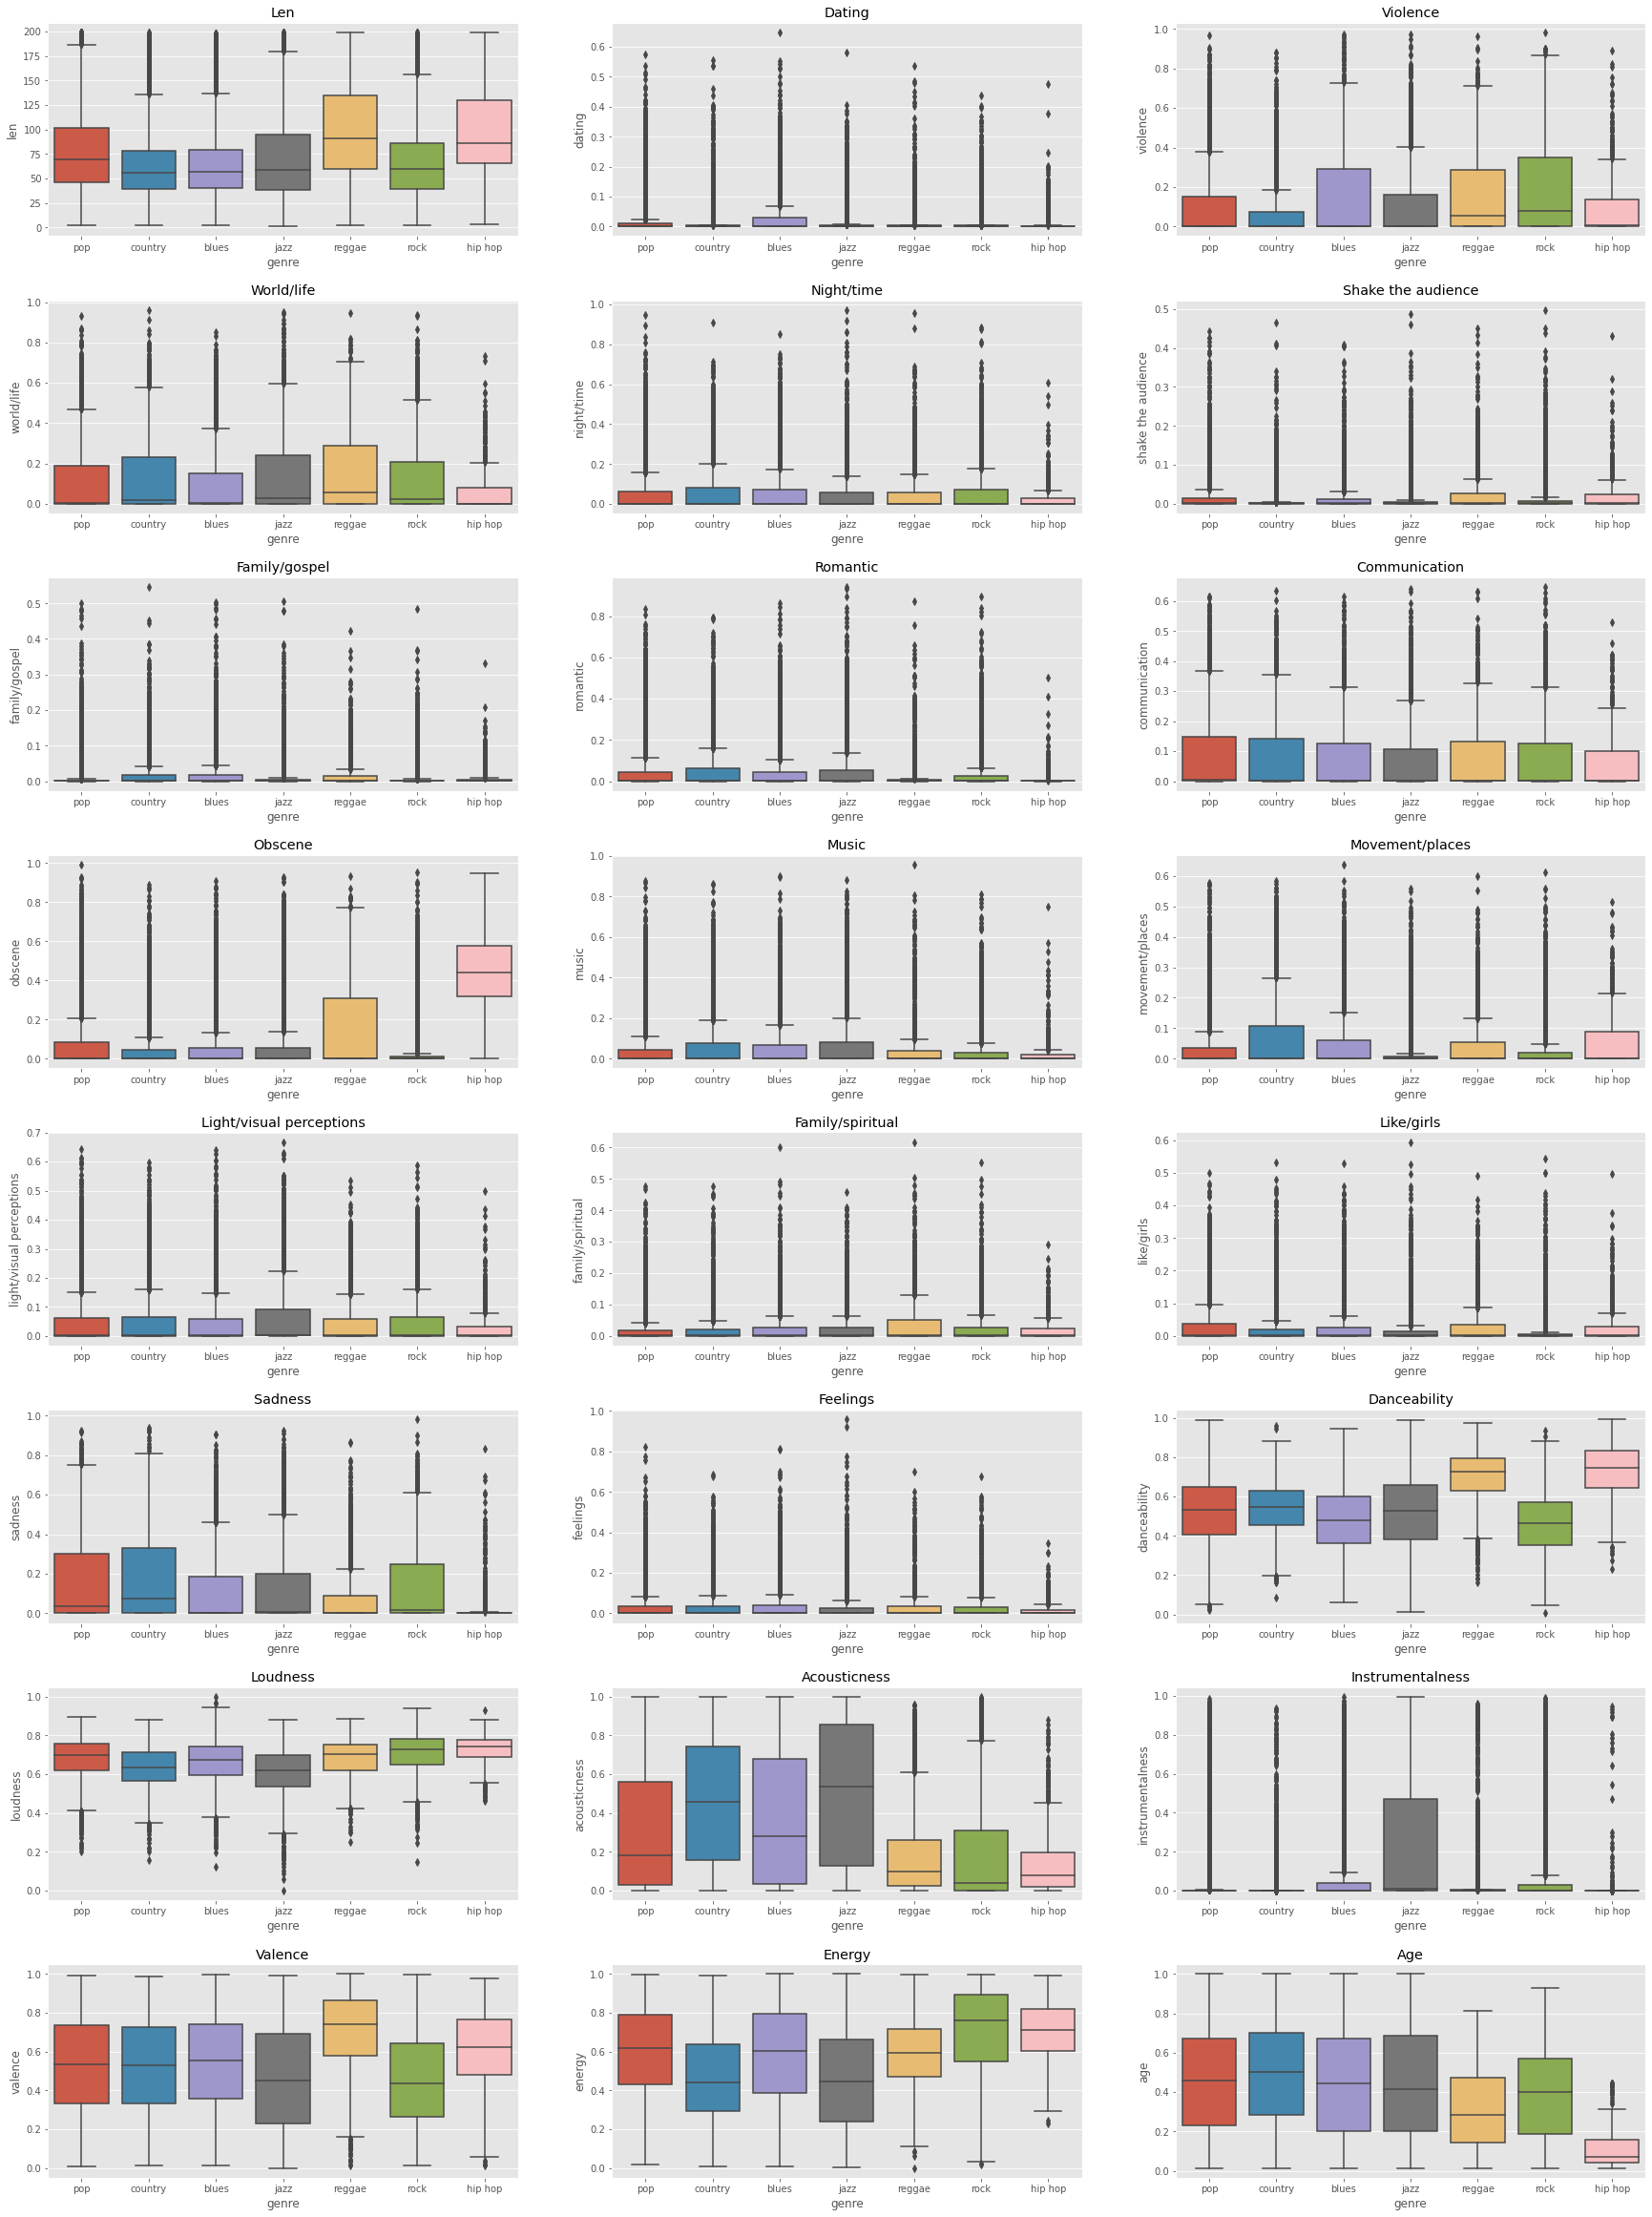

In [18]:
features = ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy','age']
fig, ax = plt.subplots(8,3, figsize=(30,32))
for i in range(len(features)):
    sns.boxplot(x="genre", y=features[i], data=df, ax = ax[int(i/3)][i%3])
    ax[int(i/3)][i%3].title.set_text(features[i].capitalize())
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3)

plt.show()

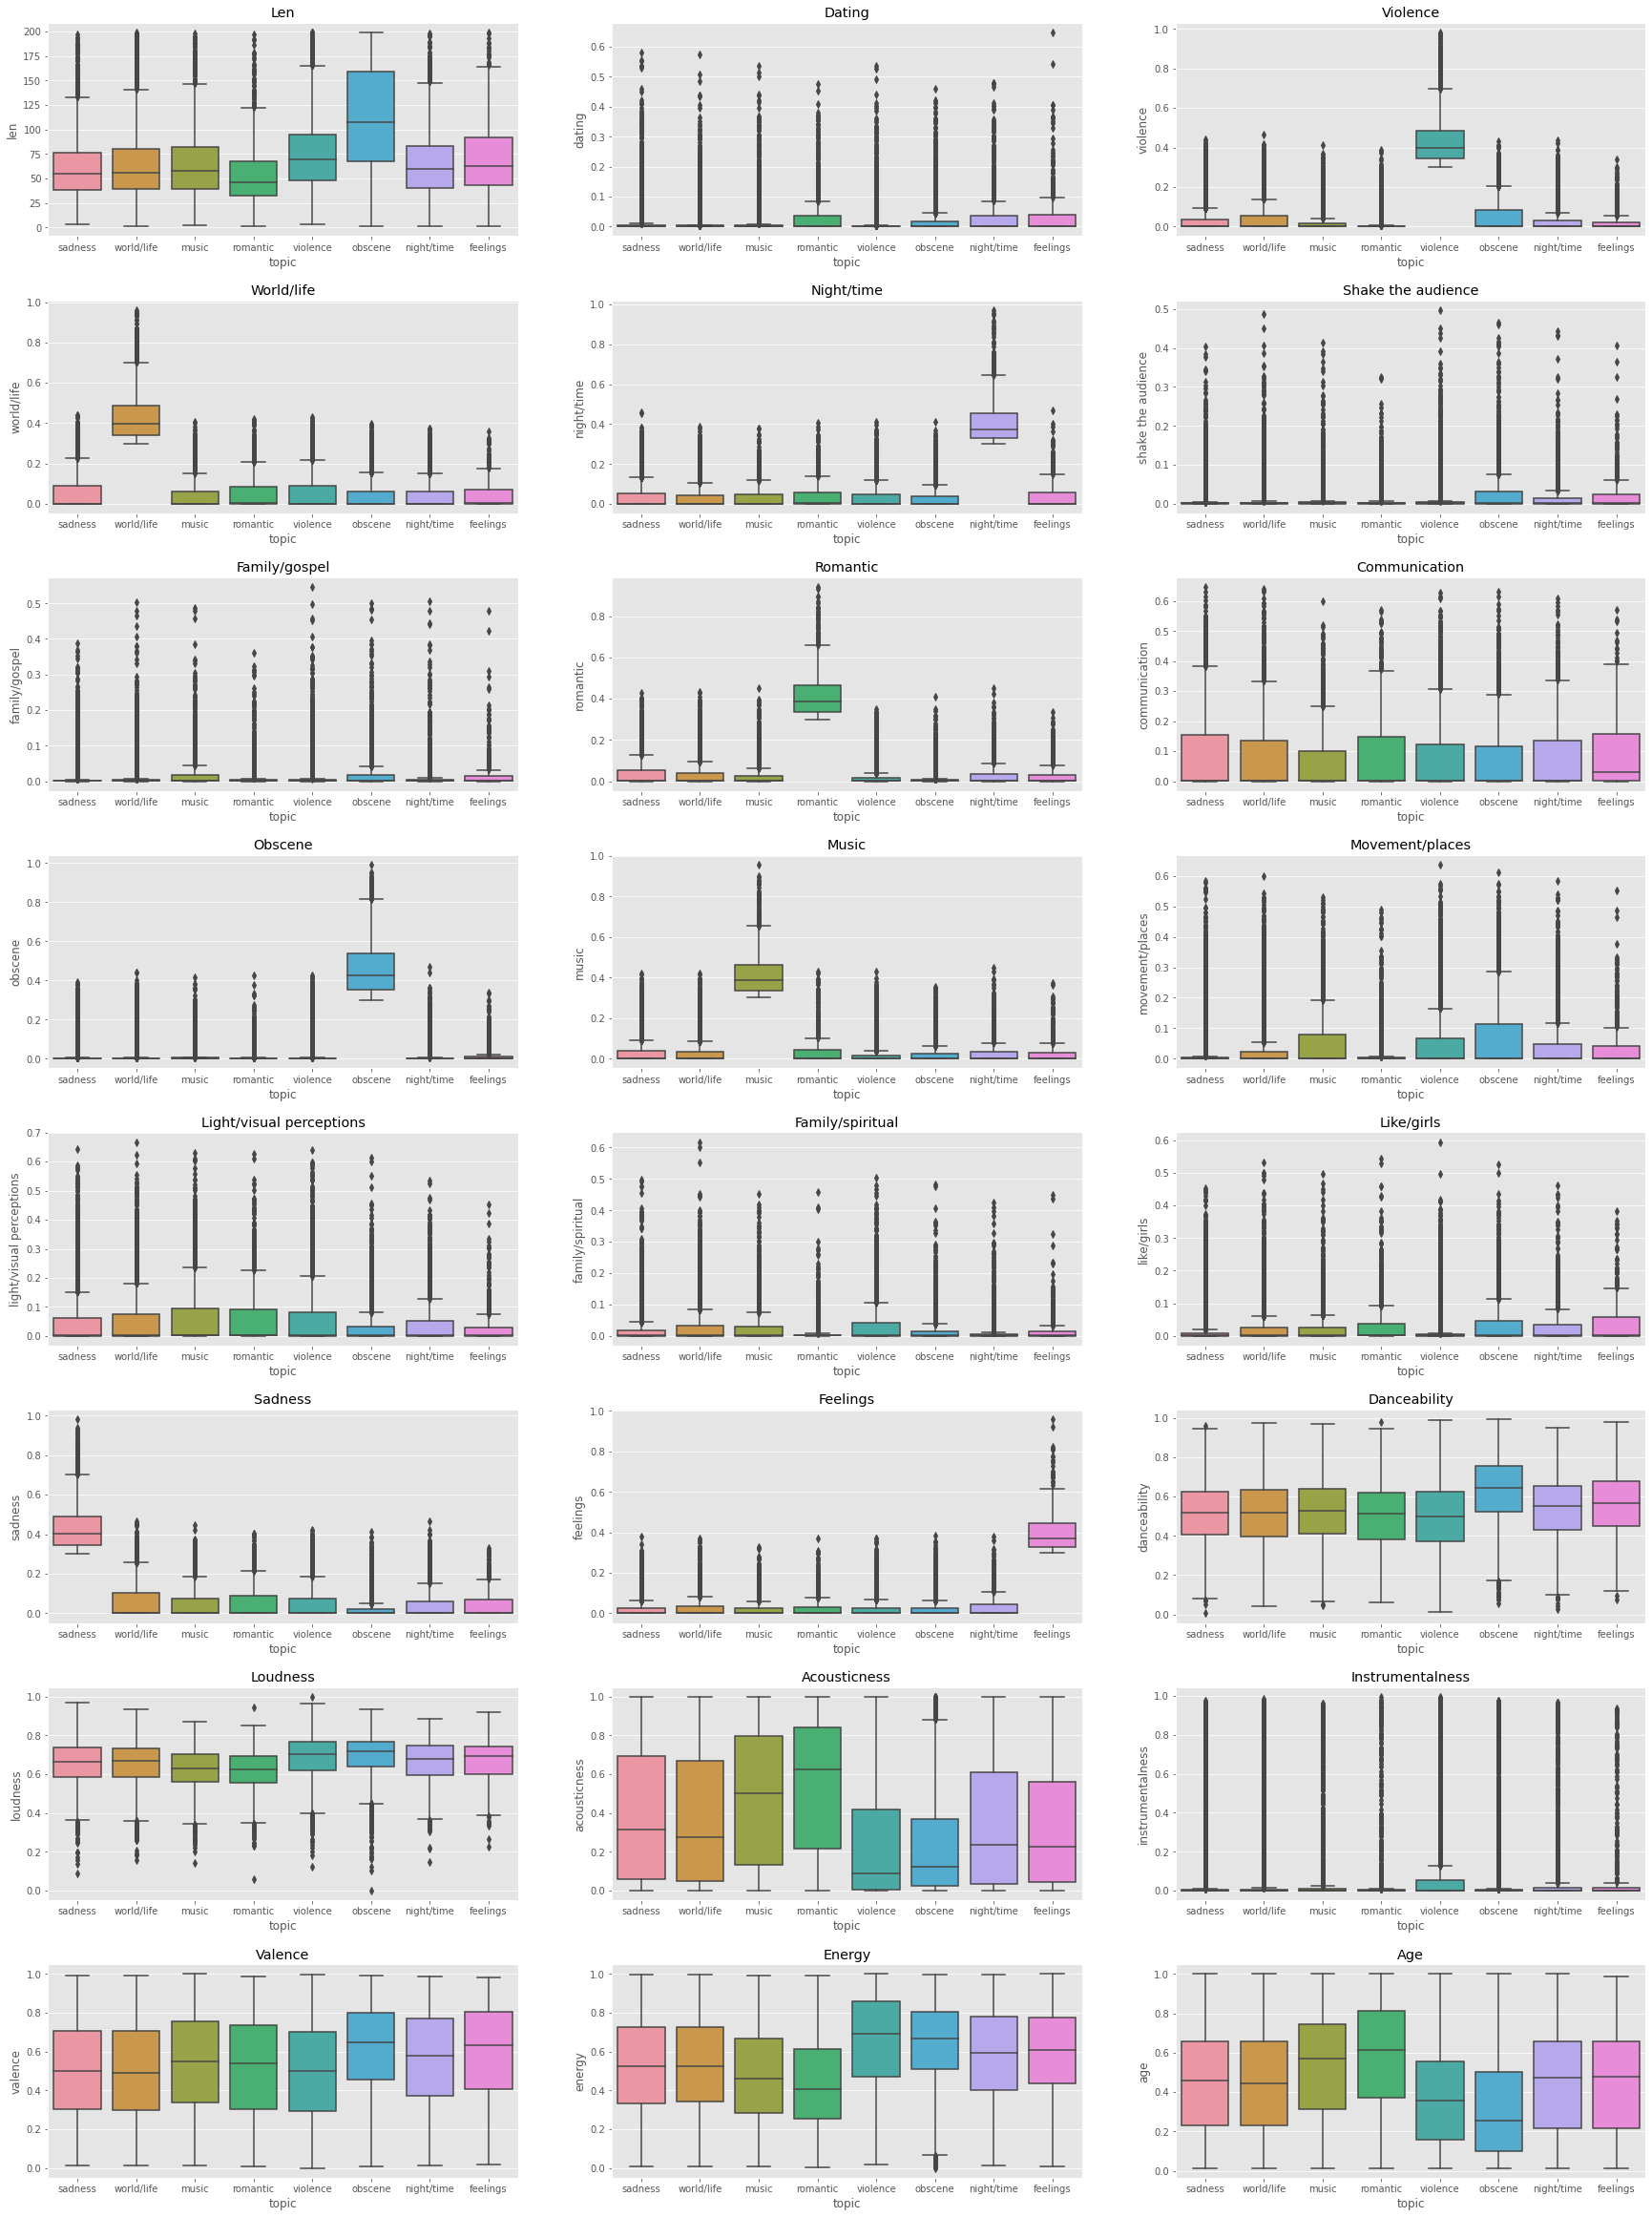

In [19]:
fig, ax = plt.subplots(8,3, figsize=(30,32))
for i in range(len(features)):
    sns.boxplot(x="topic", y=features[i], data=df, ax = ax[int(i/3)][i%3])
    ax[int(i/3)][i%3].title.set_text(features[i].capitalize())
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3)

plt.show()

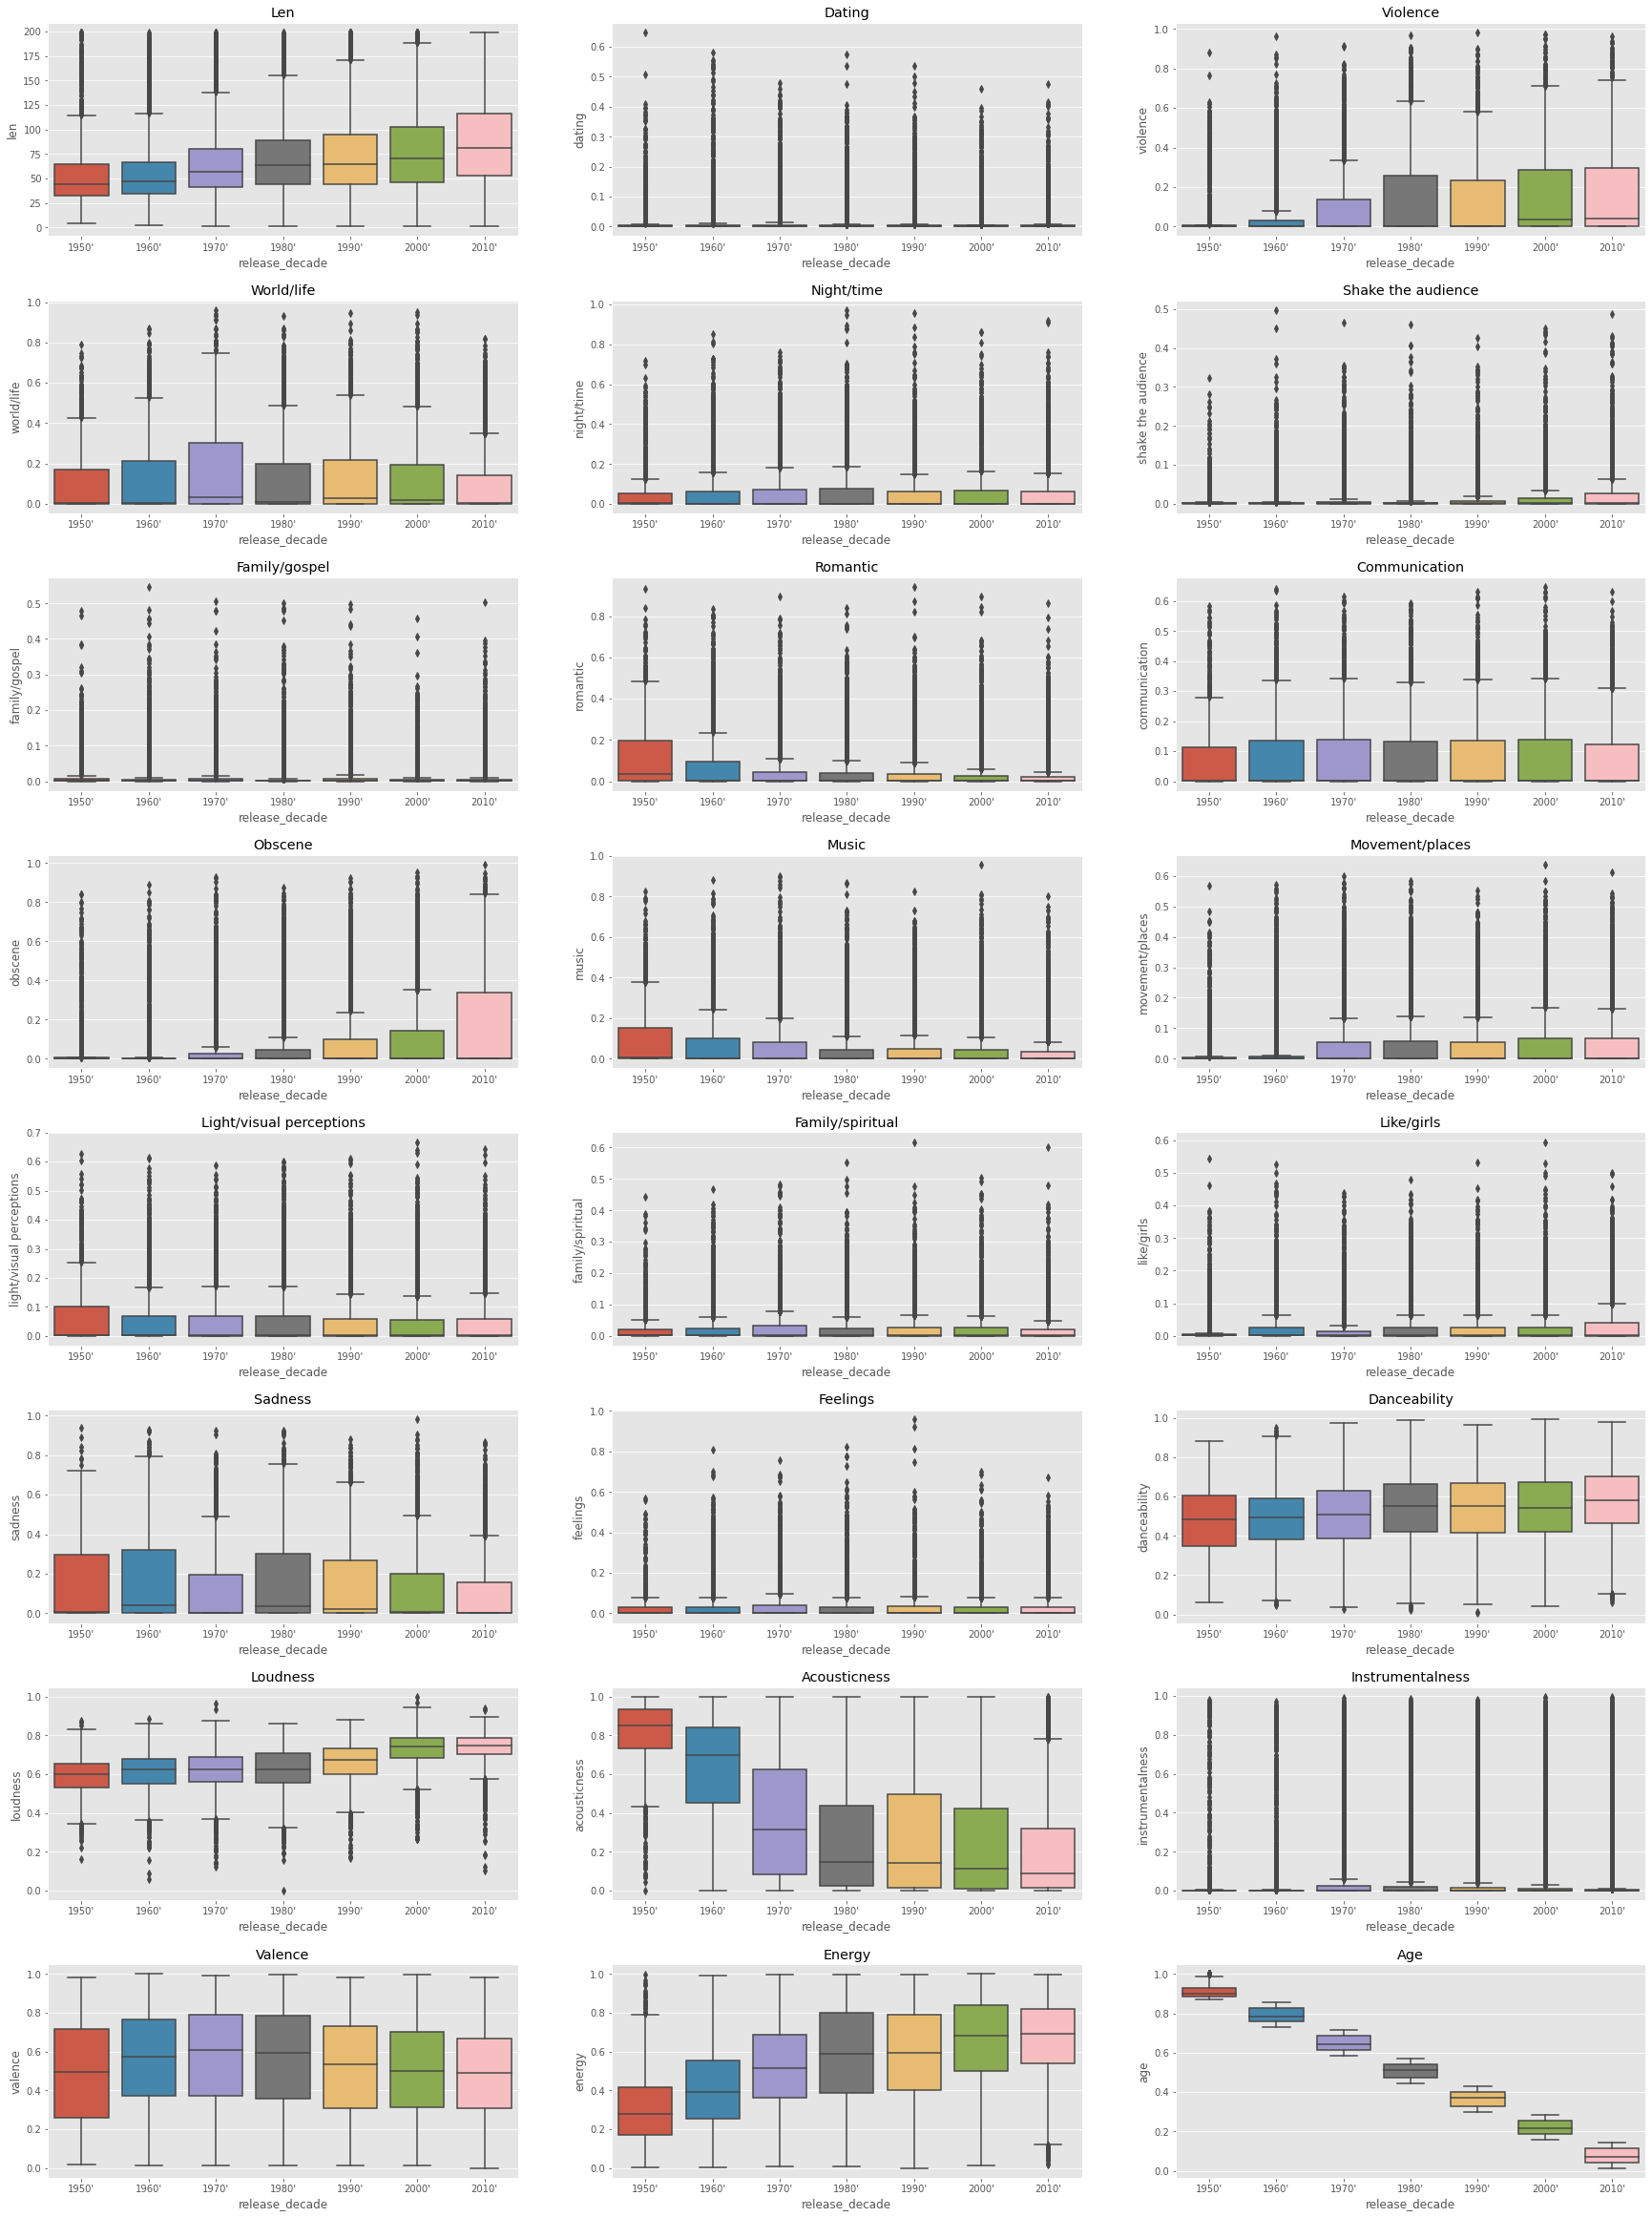

In [20]:
features = ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy','age']
fig, ax = plt.subplots(8,3, figsize=(30,32))
for i in range(len(features)):
    sns.boxplot(x="release_decade", y=features[i], data=df, ax = ax[int(i/3)][i%3])
    ax[int(i/3)][i%3].title.set_text(features[i].capitalize())
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3)

plt.show()

In [21]:
df['label1'] = 0
for index,row in df.iterrows():
    df.loc[(df['genre'] == 'pop'), 'label1'] = 0
    df.loc[(df['genre'] == 'country'), 'label1'] = 1
    df.loc[(df['genre'] == 'blues'), 'label1'] = 2
    df.loc[(df['genre'] == 'jazz'), 'label1'] = 3
    df.loc[(df['genre'] == 'reggae'), 'label1'] = 4
    df.loc[(df['genre'] == 'rock'), 'label1'] = 5
    df.loc[(df['genre'] == 'hip hop'), 'label1'] = 6

In [22]:
df['label2'] = 0
for index,row in df.iterrows():
    df.loc[(df['topic'] == 'sadness'), 'label2'] = 0
    df.loc[(df['topic'] == 'world/life'), 'label2'] = 1
    df.loc[(df['topic'] == 'music'), 'label2'] = 2
    df.loc[(df['topic'] == 'romantic'), 'label2'] = 3
    df.loc[(df['topic'] == 'violence'), 'label2'] = 4
    df.loc[(df['topic'] == 'obscene'), 'label2'] = 5
    df.loc[(df['topic'] == 'night/time'), 'label2'] = 6
    df.loc[(df['topic'] == 'feelings'), 'label2'] = 7

In [23]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=10)
data = df['lyrics']
features = vectorizer.fit_transform(data).toarray()
X = features
print(X.shape)

(28372, 23837)


In [24]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, df.label2, test_size = 0.2)

In [25]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5)

E:\Altele2\Anaconda\envs\DataVisualization\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9428974268593585
2837


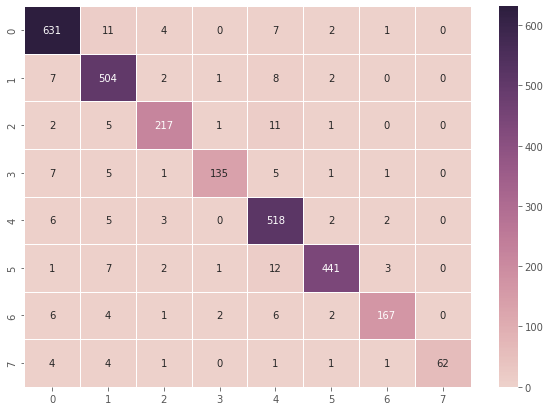

In [26]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
yv_predicted = lr.predict(X_val)
score = lr.score(X_val, y_val)
print(score)

cm = pd.DataFrame(confusion_matrix(y_val, yv_predicted), index = [0,1,2,3,4,5,6,7], columns = [0,1,2,3,4,5,6,7])
print(sum(sum(confusion_matrix(y_val,yv_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, linewidths =.5, fmt = 'd', cmap = sns.cubehelix_palette(as_cmap = True))
plt.show()

0.9492600422832981
2838


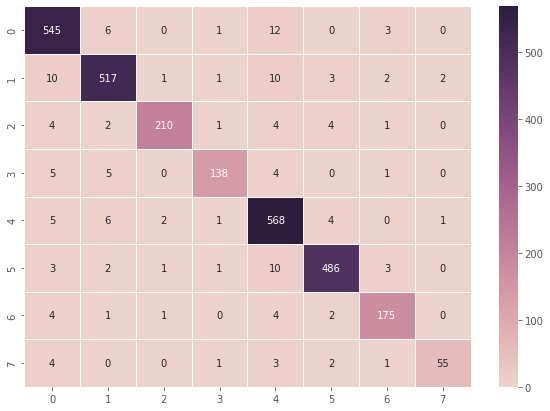

In [27]:
yt_predicted = lr.predict(X_test)
score = lr.score(X_test, y_test)
print(score)
cm = pd.DataFrame(confusion_matrix(y_test, yt_predicted), index = [0,1,2,3,4,5,6,7], columns = [0,1,2,3,4,5,6,7])
print(sum(sum(confusion_matrix(y_test, yt_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, linewidths =.5, fmt = 'd', cmap = sns.cubehelix_palette(as_cmap = True))
plt.show()

0.7254141698977793
2837


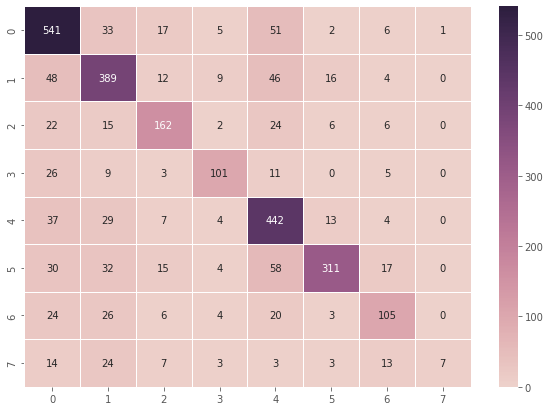

In [28]:
from sklearn.naive_bayes import BernoulliNB
brn = BernoulliNB()
brn.fit(X_train, y_train)
y_predicted = brn.predict(X_val)
score = brn.score(X_val,y_val)
print(score)

df_cm = pd.DataFrame(confusion_matrix(y_val, y_predicted), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
print(sum(sum(confusion_matrix(y_val, y_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.7459478505990134
2838


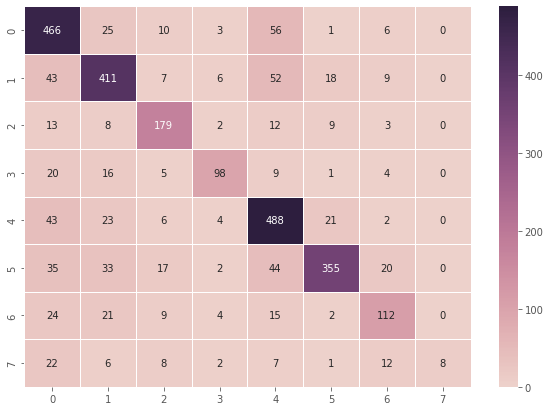

In [29]:
predicted = brn.predict(X_test)
score = brn.score(X_test, y_test)
print(score)
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
print(sum(sum(confusion_matrix(y_test, predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.7663024321466337
2837


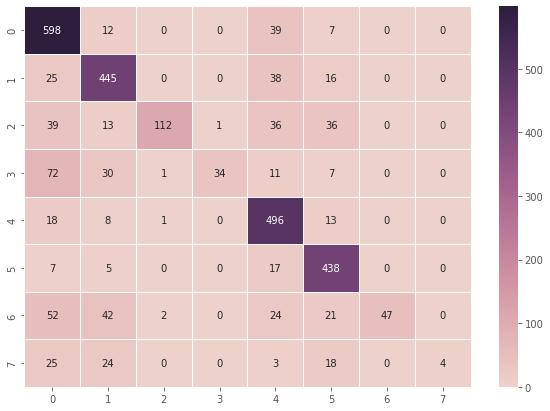

In [30]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_val)
score = clf.score(X_val,y_val)
print(score)

df_cm = pd.DataFrame(confusion_matrix(y_val, y_predicted), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
print(sum(sum(confusion_matrix(y_val, y_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.7840028188865398
2838


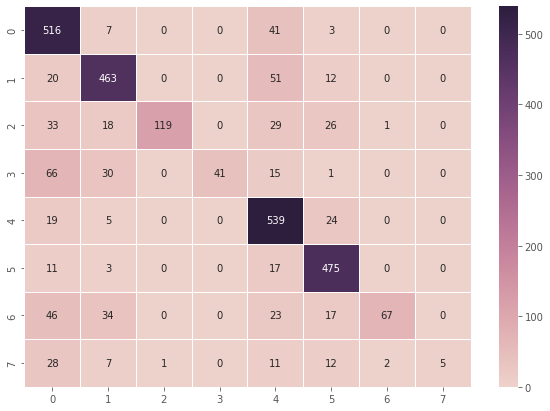

In [31]:
predicted = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
print(sum(sum(confusion_matrix(y_test, predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.9414874867818118
2837


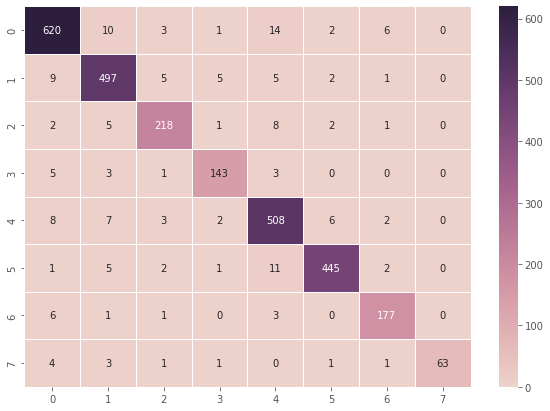

In [32]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_val)
score = clf.score(X_val,y_val)
print(score)

df_cm = pd.DataFrame(confusion_matrix(y_val, y_predicted), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
print(sum(sum(confusion_matrix(y_val, y_predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

0.9496124031007752
2838


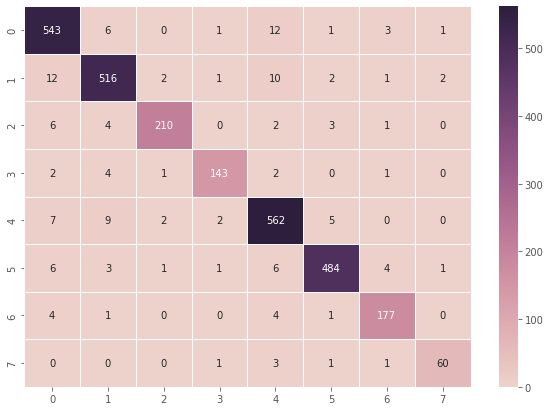

In [33]:
predicted = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)
df_cm = pd.DataFrame(confusion_matrix(y_test, predicted), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
print(sum(sum(confusion_matrix(y_test, predicted))))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [34]:
X = df['lyrics']
y = df['label2']
num_words = X.shape[0]
embed_dim = 32
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X)
length = []
for i in sequences:
    length.append(len(i))
print(np.max(length))

199


In [35]:
X = pad_sequences (sequences, padding = 'post')

In [36]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5)

In [37]:
#model
def build_model(nr_labels, length):
    model = Sequential()
    model.add(Embedding(num_words, embed_dim, input_length = length))
    model.add(LSTM(32, return_sequences=True))
    model.add(GlobalMaxPool1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(nr_labels, activation='sigmoid'))
    return model

def build_compiled_model(length):
    model = build_model(nr_labels=8, length = length)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


model = build_compiled_model(np.max(length))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 199, 32)           907904    
                                                                 
 lstm (LSTM)                 (None, 199, 32)           8320      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                        

In [38]:
#train model
history = model.fit(x=X_train, y=y_train, epochs=5, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/5
710/710 [==============================] - 33s 44ms/step - loss: 1.2607 - accuracy: 0.5069 - val_loss: 0.7541 - val_accuracy: 0.7244
Epoch 2/5
710/710 [==============================] - 31s 44ms/step - loss: 0.4871 - accuracy: 0.8350 - val_loss: 0.4564 - val_accuracy: 0.8488
Epoch 3/5
710/710 [==============================] - 30s 42ms/step - loss: 0.2309 - accuracy: 0.9277 - val_loss: 0.4242 - val_accuracy: 0.8717
Epoch 4/5
710/710 [==============================] - 31s 43ms/step - loss: 0.1344 - accuracy: 0.9584 - val_loss: 0.4156 - val_accuracy: 0.8823
Epoch 5/5
710/710 [==============================] - 31s 44ms/step - loss: 0.0854 - accuracy: 0.9744 - val_loss: 0.4602 - val_accuracy: 0.8819


In [39]:
#make predictions
y_pred = np.argmax(model.predict(X_val), axis=1)

On validation data:
Accuracy: 0.88


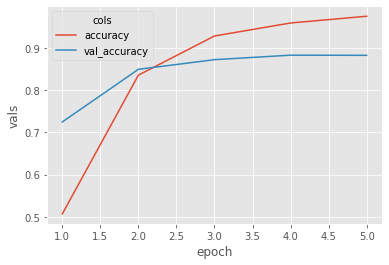

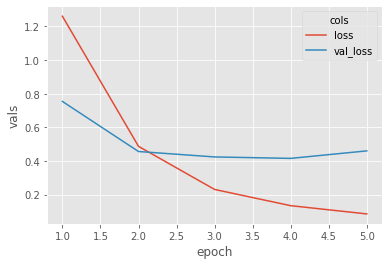

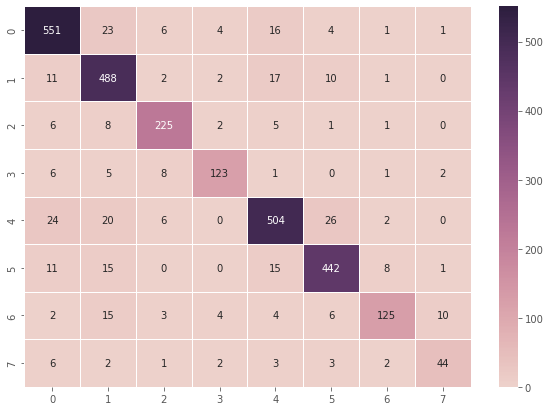

In [40]:
print('On validation data:')
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred))

# plot graphs
metrics_df = pd.DataFrame(history.history).reset_index().rename(columns={"index": "epoch"})
metrics_df['epoch'] = metrics_df['epoch'] + 1
acc_df = metrics_df[['epoch', 'accuracy', 'val_accuracy']].melt('epoch', var_name='cols', value_name='vals')
loss_df = metrics_df[['epoch', 'loss', 'val_loss']].melt('epoch', var_name='cols', value_name='vals')
sns.lineplot(data=acc_df, x='epoch', y='vals', hue='cols')
plt.show()
sns.lineplot(data=loss_df, x='epoch', y='vals', hue='cols')
plt.show()

# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_val, y_pred), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [41]:
pred = np.argmax(model.predict(X_test), axis=1)

On test data:
Accuracy: 0.88


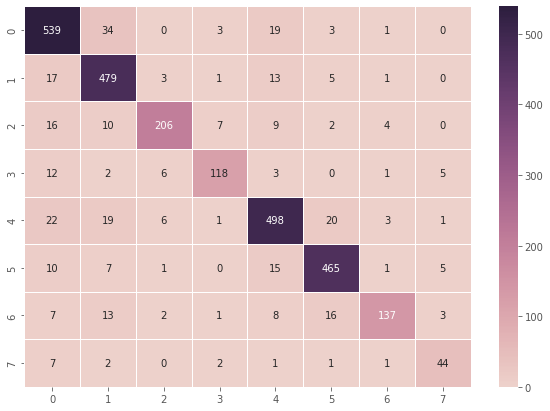

In [42]:
print('On test data:')
print('Accuracy: %.2f' % accuracy_score(y_test, pred))
# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, pred), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [43]:
def build_model(nr_labels, length):
    model = Sequential()
    model.add(Embedding(num_words, embed_dim, input_length = length))
    model.add(Conv1D(128, kernel_size=5, activation='relu'))
    model.add(MaxPool1D(3))
    model.add(Dropout(0.2))
    model.add(Conv1D(256, kernel_size=5, activation='relu'))
    model.add(MaxPool1D(3))
    model.add(Dropout(0.2))
    model.add(Conv1D(256, kernel_size=5, activation='relu'))
    model.add(MaxPool1D(3))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(nr_labels, activation='softmax'))

    return model

def build_compiled_model(length):
    model = build_model(nr_labels=8, length = length)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


model = build_compiled_model(np.max(length))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 199, 32)           907904    
                                                                 
 conv1d (Conv1D)             (None, 195, 128)          20608     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 65, 128)          0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 65, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 61, 256)           164096    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 20, 256)          0         
 1D)                                                  

In [44]:
#train model
history = model.fit(x=X_train, y=y_train, epochs=3, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/3
710/710 [==============================] - 26s 36ms/step - loss: 1.0533 - accuracy: 0.5973 - val_loss: 0.5360 - val_accuracy: 0.8238
Epoch 2/3
710/710 [==============================] - 25s 35ms/step - loss: 0.3564 - accuracy: 0.8806 - val_loss: 0.4519 - val_accuracy: 0.8632
Epoch 3/3
710/710 [==============================] - 25s 35ms/step - loss: 0.1570 - accuracy: 0.9506 - val_loss: 0.4247 - val_accuracy: 0.8844


In [45]:
#make predictions
y_pred = np.argmax(model.predict(X_val), axis=1)

On validation data:
Accuracy: 0.88


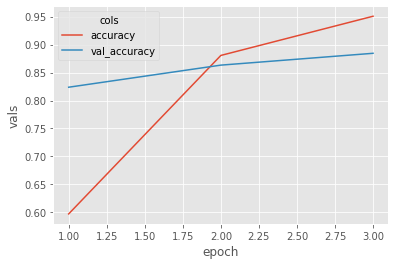

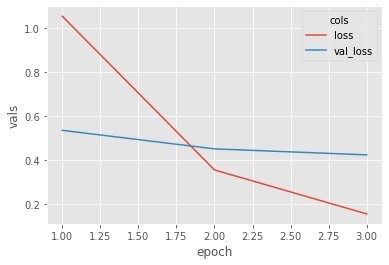

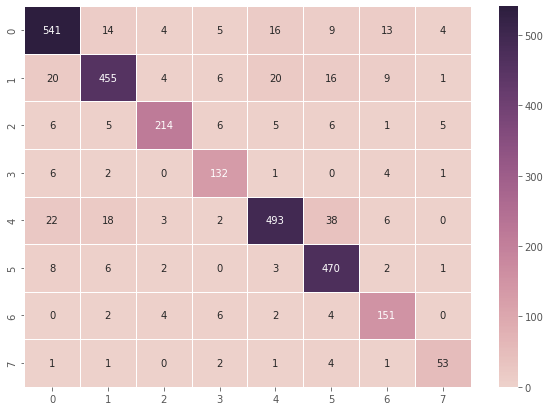

In [46]:
print('On validation data:')
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred))

# plot graphs
metrics_df = pd.DataFrame(history.history).reset_index().rename(columns={"index": "epoch"})
metrics_df['epoch'] = metrics_df['epoch'] + 1
acc_df = metrics_df[['epoch', 'accuracy', 'val_accuracy']].melt('epoch', var_name='cols', value_name='vals')
loss_df = metrics_df[['epoch', 'loss', 'val_loss']].melt('epoch', var_name='cols', value_name='vals')
sns.lineplot(data=acc_df, x='epoch', y='vals', hue='cols')
plt.show()
sns.lineplot(data=loss_df, x='epoch', y='vals', hue='cols')
plt.show()

# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_val, y_pred), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [47]:
pred = np.argmax(model.predict(X_test), axis=1)

On test data:
Accuracy: 0.89


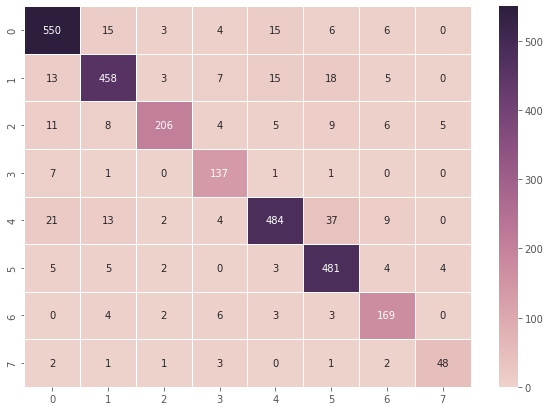

In [48]:
print('On test data:')
print('Accuracy: %.2f' % accuracy_score(y_test, pred))
# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, pred), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [49]:
df2 = pd.DataFrame()
df2['lyrics'] = df['lyrics']
df2['label1'] = df['label1']
df2['label2'] = df['label2']

In [50]:
sound_features = []
for index,row in df.iterrows():
    row_features = []
    row_features.append(row['dating'])
    row_features.append(row['violence'])
    row_features.append(row['world/life'])
    row_features.append(row['night/time'])
    row_features.append(row['shake the audience'])
    row_features.append(row['family/gospel'])
    row_features.append(row['romantic'])
    row_features.append(row['communication'])
    row_features.append(row['obscene'])
    row_features.append(row['music'])
    row_features.append(row['movement/places'])
    row_features.append(row['light/visual perceptions'])
    row_features.append(row['family/spiritual'])
    row_features.append(row['like/girls'])
    row_features.append(row['sadness'])
    row_features.append(row['feelings'])
    
#     row_features.append(row['danceability'])
#     row_features.append(row['loudness'])
#     row_features.append(row['acousticness'])
#     row_features.append(row['instrumentalness'])
#     row_features.append(row['valence'])
#     row_features.append(row['energy'])
    
#     row_features.append(row['age'])
    
    sound_features.append(row_features)
df2['features'] = sound_features

In [51]:
X = df2['features']
y = df2['label2']


In [52]:
X = X.tolist()
y = y.tolist()

In [53]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5)

In [54]:
def build_model(nr_labels):
    model = Sequential()
    model.add(Dense(32, activation='relu',input_shape=(16,)))
    model.add(Dense(nr_labels, activation='softmax'))

    return model

def build_compiled_model(length):
    model = build_model(nr_labels=8)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


model = build_compiled_model(np.max(length))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 8)                 264       
                                                                 
Total params: 808
Trainable params: 808
Non-trainable params: 0
_________________________________________________________________


In [55]:
#train model
history = model.fit(x=X_train, y=y_train, epochs=5, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/5
710/710 [==============================] - 1s 2ms/step - loss: 0.9050 - accuracy: 0.8174 - val_loss: 0.2522 - val_accuracy: 0.9633
Epoch 2/5
710/710 [==============================] - 1s 1ms/step - loss: 0.1394 - accuracy: 0.9847 - val_loss: 0.0851 - val_accuracy: 0.9891
Epoch 3/5
710/710 [==============================] - 1s 1ms/step - loss: 0.0646 - accuracy: 0.9933 - val_loss: 0.0542 - val_accuracy: 0.9915
Epoch 4/5
710/710 [==============================] - 1s 1ms/step - loss: 0.0446 - accuracy: 0.9951 - val_loss: 0.0409 - val_accuracy: 0.9958
Epoch 5/5
710/710 [==============================] - 1s 967us/step - loss: 0.0356 - accuracy: 0.9952 - val_loss: 0.0341 - val_accuracy: 0.9968


In [56]:
#make predictions
y_pred = np.argmax(model.predict(X_val), axis=1)

On validation data:
Accuracy: 1.00


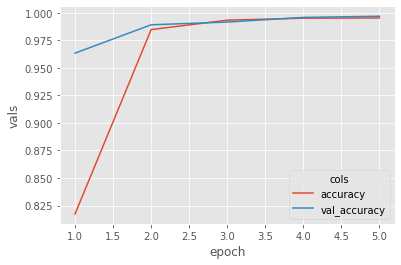

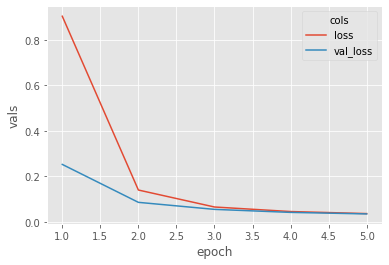

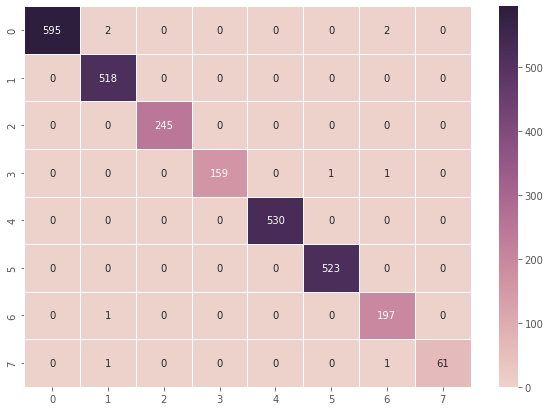

In [57]:
print('On validation data:')
print('Accuracy: %.2f' % accuracy_score(y_val, y_pred))

# plot graphs
metrics_df = pd.DataFrame(history.history).reset_index().rename(columns={"index": "epoch"})
metrics_df['epoch'] = metrics_df['epoch'] + 1
acc_df = metrics_df[['epoch', 'accuracy', 'val_accuracy']].melt('epoch', var_name='cols', value_name='vals')
loss_df = metrics_df[['epoch', 'loss', 'val_loss']].melt('epoch', var_name='cols', value_name='vals')
sns.lineplot(data=acc_df, x='epoch', y='vals', hue='cols')
plt.show()
sns.lineplot(data=loss_df, x='epoch', y='vals', hue='cols')
plt.show()

# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_val, y_pred), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

In [58]:
pred = np.argmax(model.predict(X_test), axis=1)

On test data:
Accuracy: 1.00


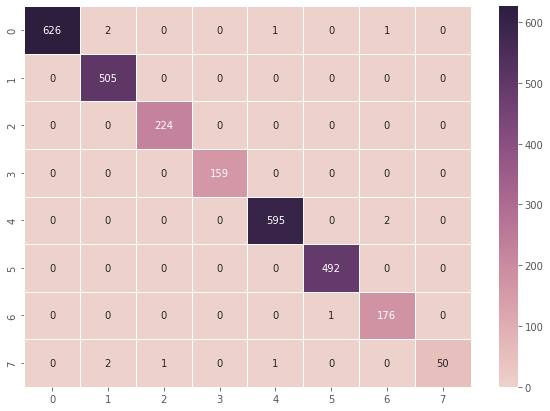

In [59]:
print('On test data:')
print('Accuracy: %.2f' % accuracy_score(y_test, pred))
# plot confusion matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, pred), index=[0,1,2,3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  linewidths=.5, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()